# PlaneSections for beams
this is my favorite beam analuze. It's built on the OpenSeesPy library but its easier to use. [Help](https://planesections.readthedocs.io/en/stable/index.html)
![](https://github.com/cslotboom/planesections/raw/main/doc/img/Beam%20Image.png)

In [21]:
# !pip install planesections

## Simple example

Creates a diagram of the created beam. Only certain fixities are supported for plotting, including free, roller (support only in y), pinned (support in x and y), and fixed (support in x/y/rotation). Only certain forces are supported for plotting - for distrubuted forces only the y component of the beam can be plotted.

Note, the diagram has been rescaled so the beam has lenght scaled to the maximum beam size of 8. This is to make consistent plotting easier across a number of beam sizes, however, the matplotlib objects in the plot have different value than the actual beam.

The resulting diagram is a matplotlib figure that can be further manipulated.

![](https://github.com/cslotboom/planesections/blob/main/doc/img/Beam-Image-2.png?raw=true)


(<Figure size 2400x480 with 1 Axes>, <Axes: >)

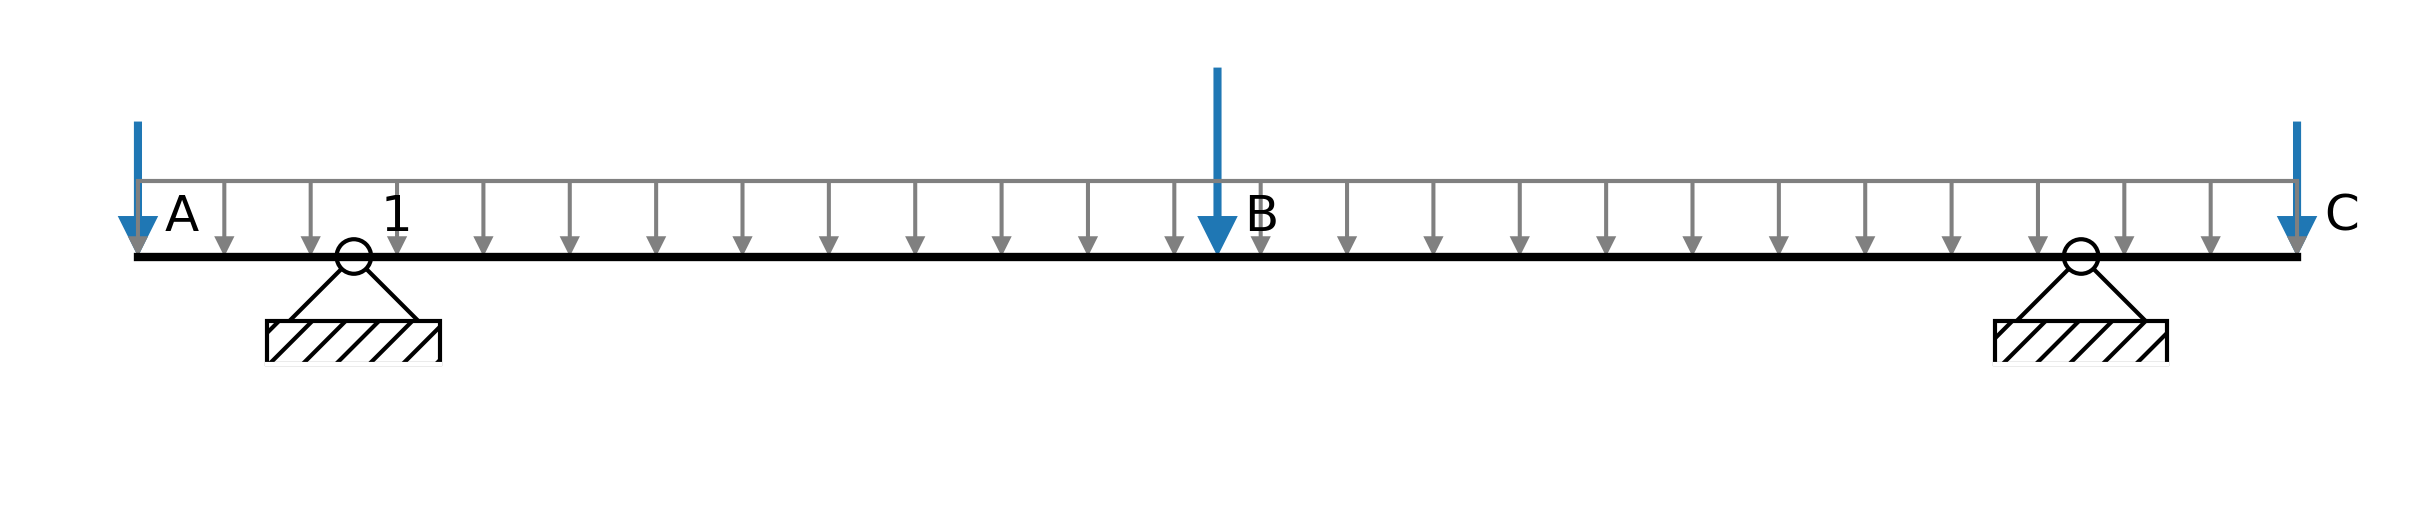

In [22]:
import planesections as ps

# Define node locations, and support conditions
L = 5
beam = ps.newEulerBeam(L)

# Define beam and fixities
pinned = [1,1,0]
beam.setFixity(L*0.1, pinned, label = '1')
beam.setFixity(L*0.9, pinned)

# Define loads
Pz = -1
beam.addVerticalLoad(0, Pz, label = 'A')
beam.addVerticalLoad(L*0.5, 2*Pz, label = 'B')
beam.addVerticalLoad(L, Pz, label = 'C')
beam.addDistLoadVertical(0, L, Pz)
#beam.addDistLoadVertical(1, L*0.3, 5*Pz)

# Plot the beam diagram
ps.plotBeamDiagram(beam)

(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (m)', ylabel='Internal Force  (N)'>,
 [<matplotlib.lines.Line2D at 0x7e290ceee7a0>])

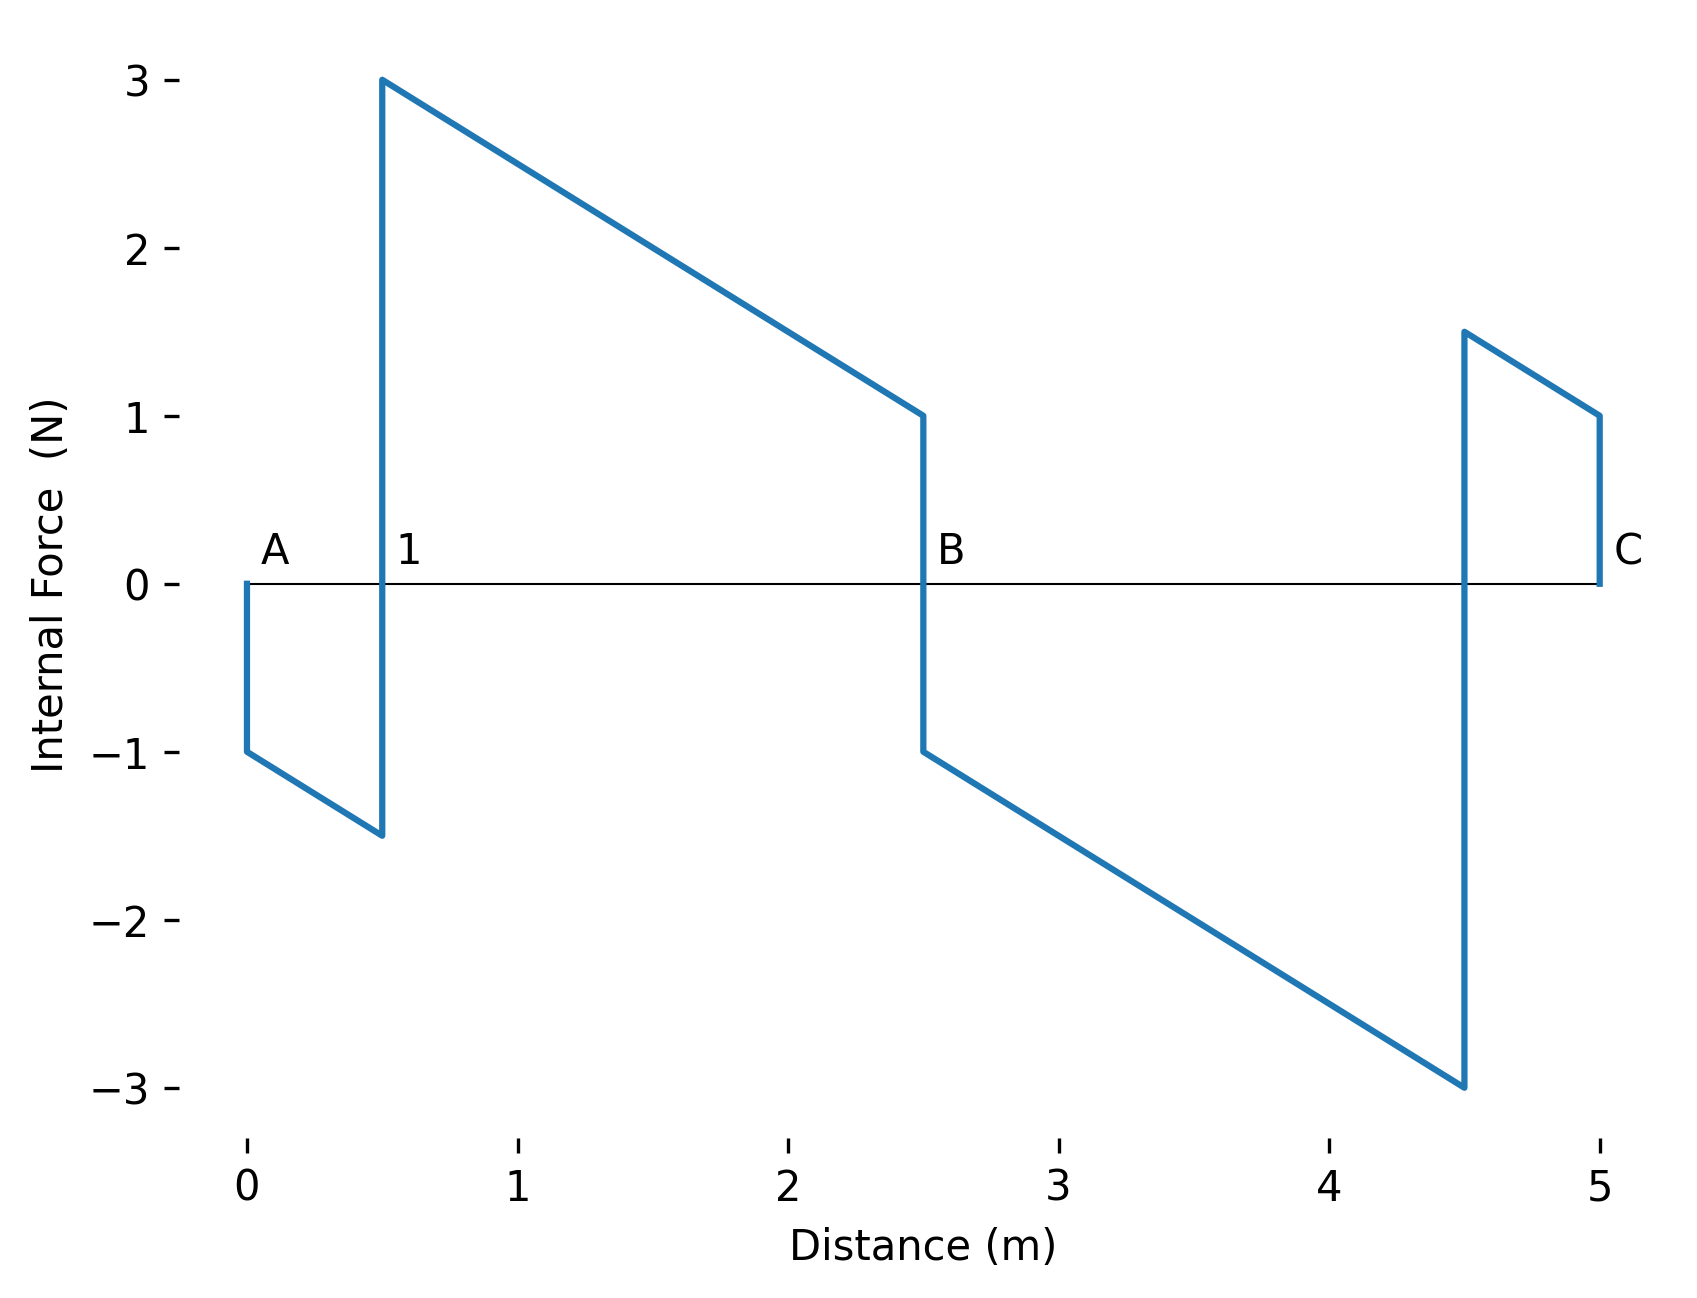

In [23]:
# Run the analysis
analysis = ps.OpenSeesAnalyzer2D(beam)
analysis.runAnalysis()

# Plot the SFD and BMD
ps.plotShear(beam)

(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (m)', ylabel='Internal Force  (Nm)'>,
 [<matplotlib.lines.Line2D at 0x7e290cf0dc90>])

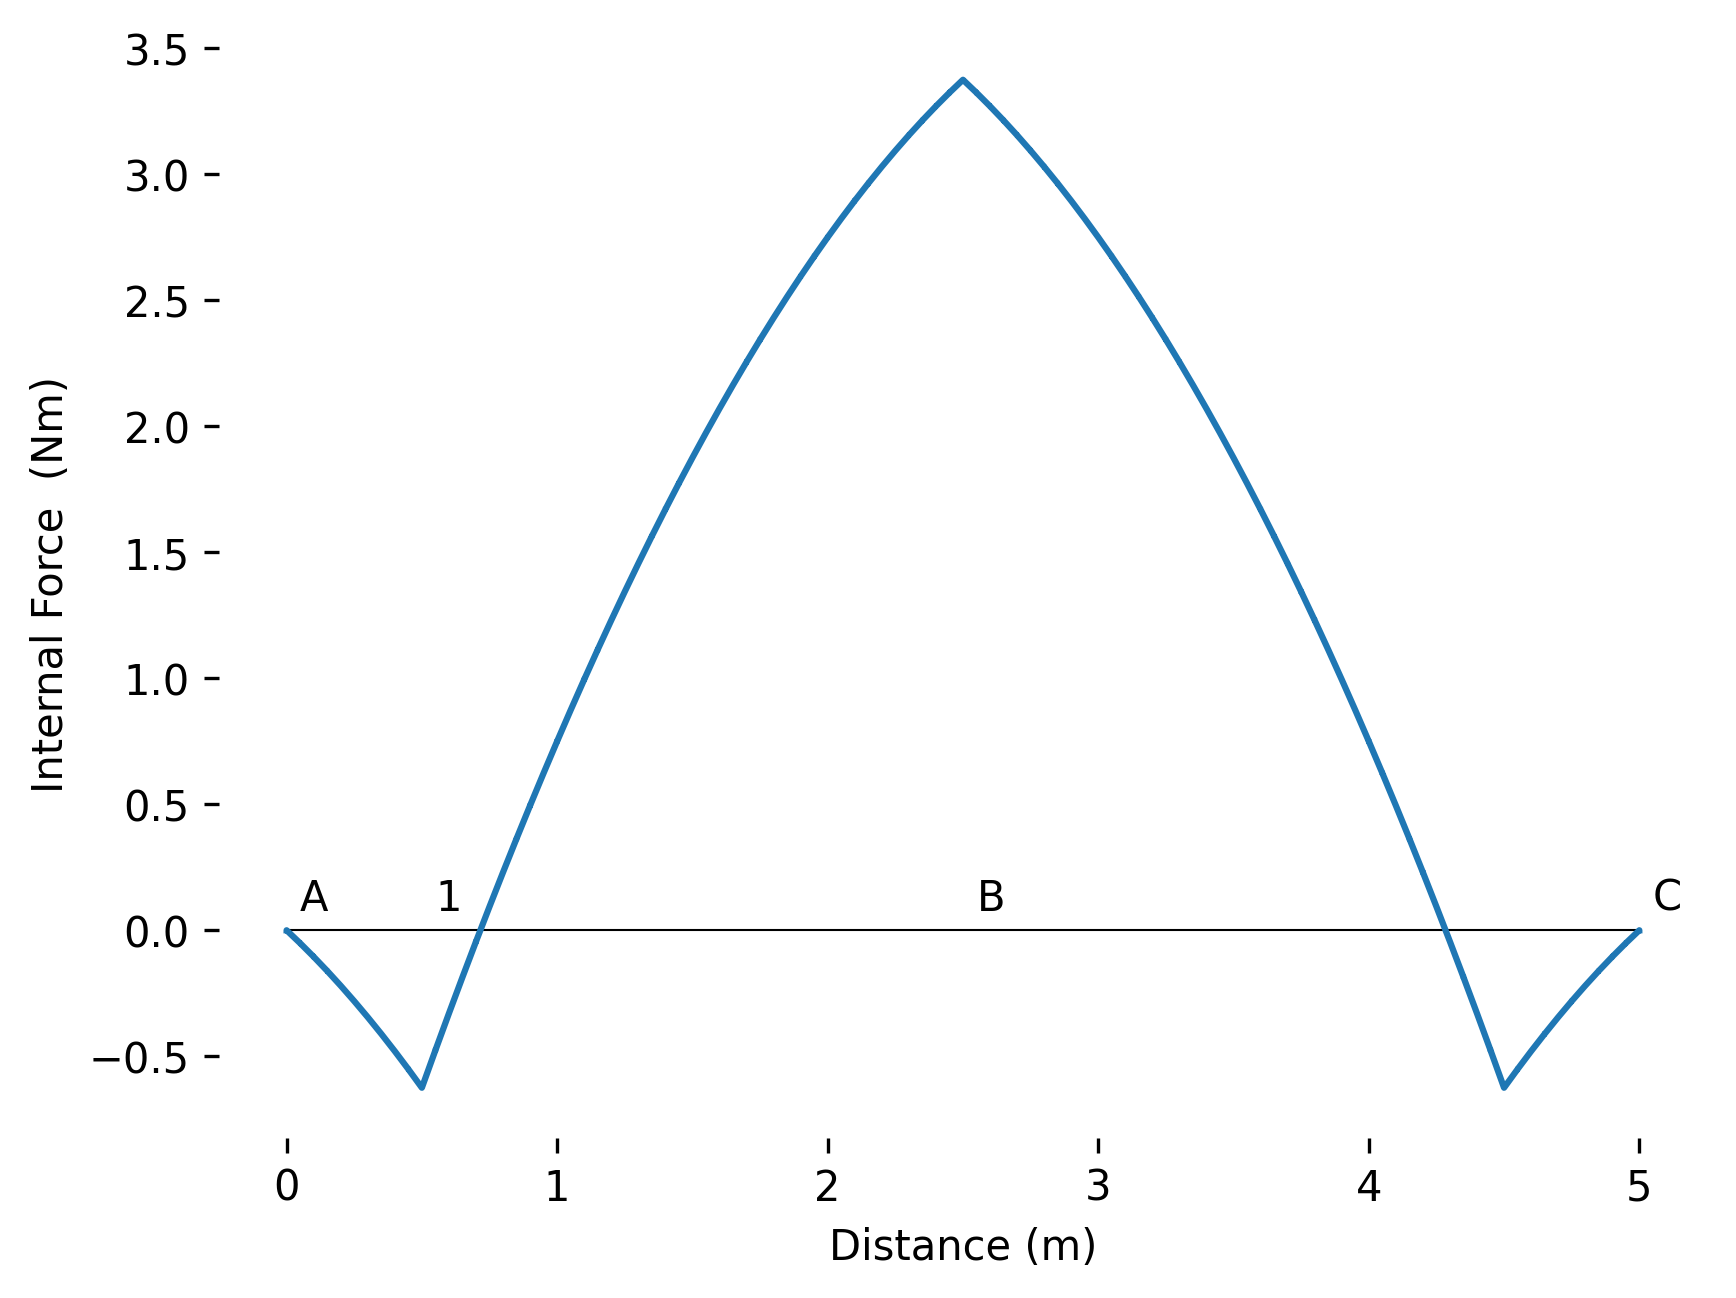

In [24]:
ps.plotMoment(beam)

## Diagram Options
[documentation](https://planesections.readthedocs.io/en/stable/rst/postprocess-plotDisp.html)

The following example shows some of the options for plotting forces.
First a basic beam is defined and loadsare applied ot it.




---


**Labels**

(<Figure size 2400x480 with 1 Axes>, <Axes: >)

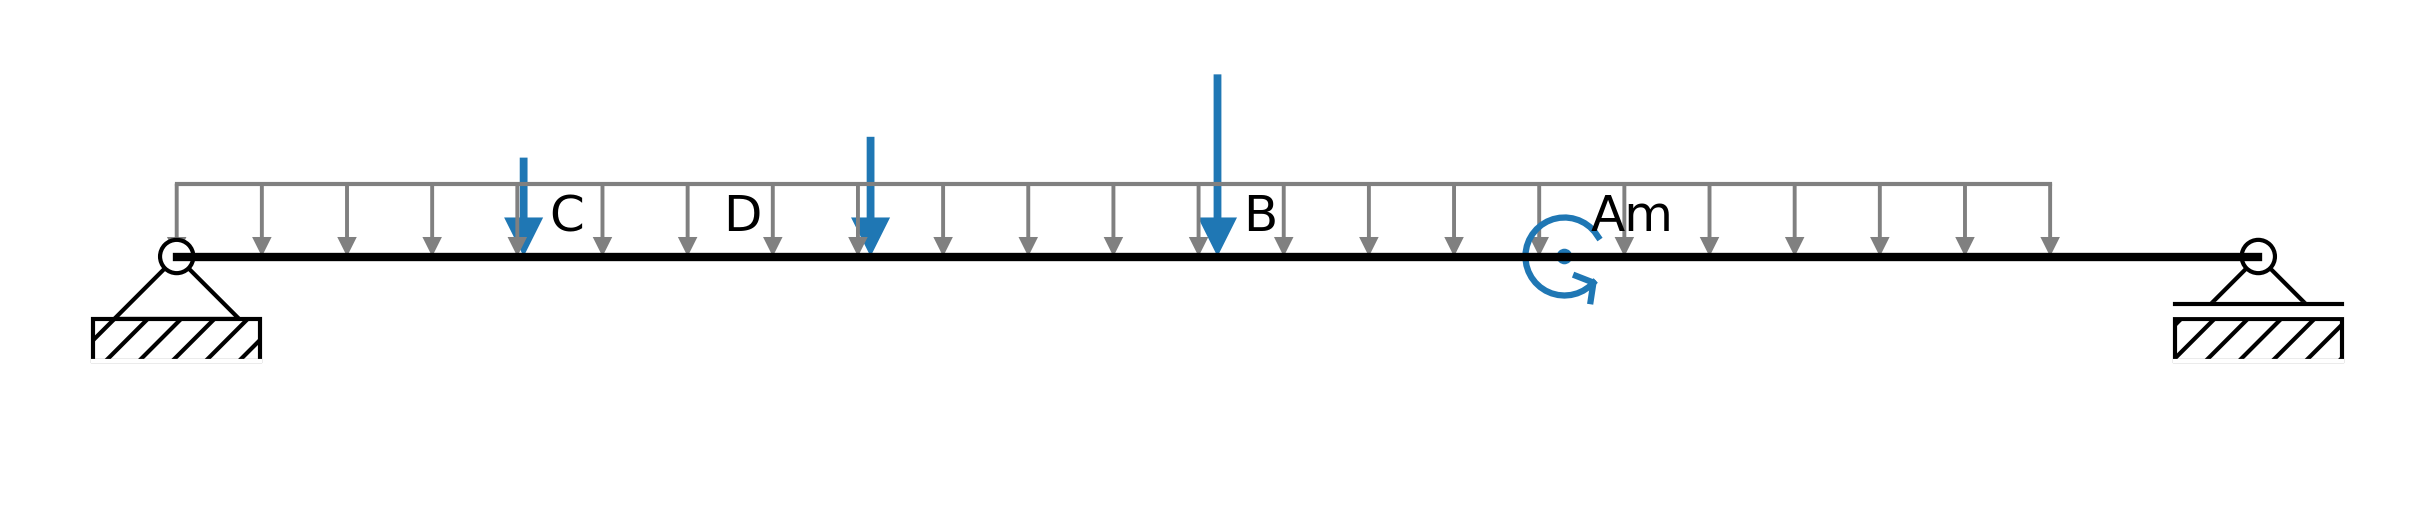

In [25]:

import planesections as ps
import numpy as np
from planesections.units.metric import m, mm, kN, GPa

L = 10*m
P = -5.*kN
beam = ps.newSimpleEulerBeam(L)
beam.addMoment(2*L/3, P/2, 'Am')
beam.addVerticalLoad(L/2, P, 'B')
beam.addVerticalLoad(L/3, P/2.5)
beam.addVerticalLoad(L/6, P/5, 'C')
beam.addDistLoadVertical(0, L*0.9, P/5, 's')
beam.addNode(L/4, label = 'D') # a point of interst on the beam

# The default plotting mode labels the location
ps.plotBeamDiagram(beam, plotLabel=True)


(<Figure size 2400x480 with 1 Axes>, <Axes: >)

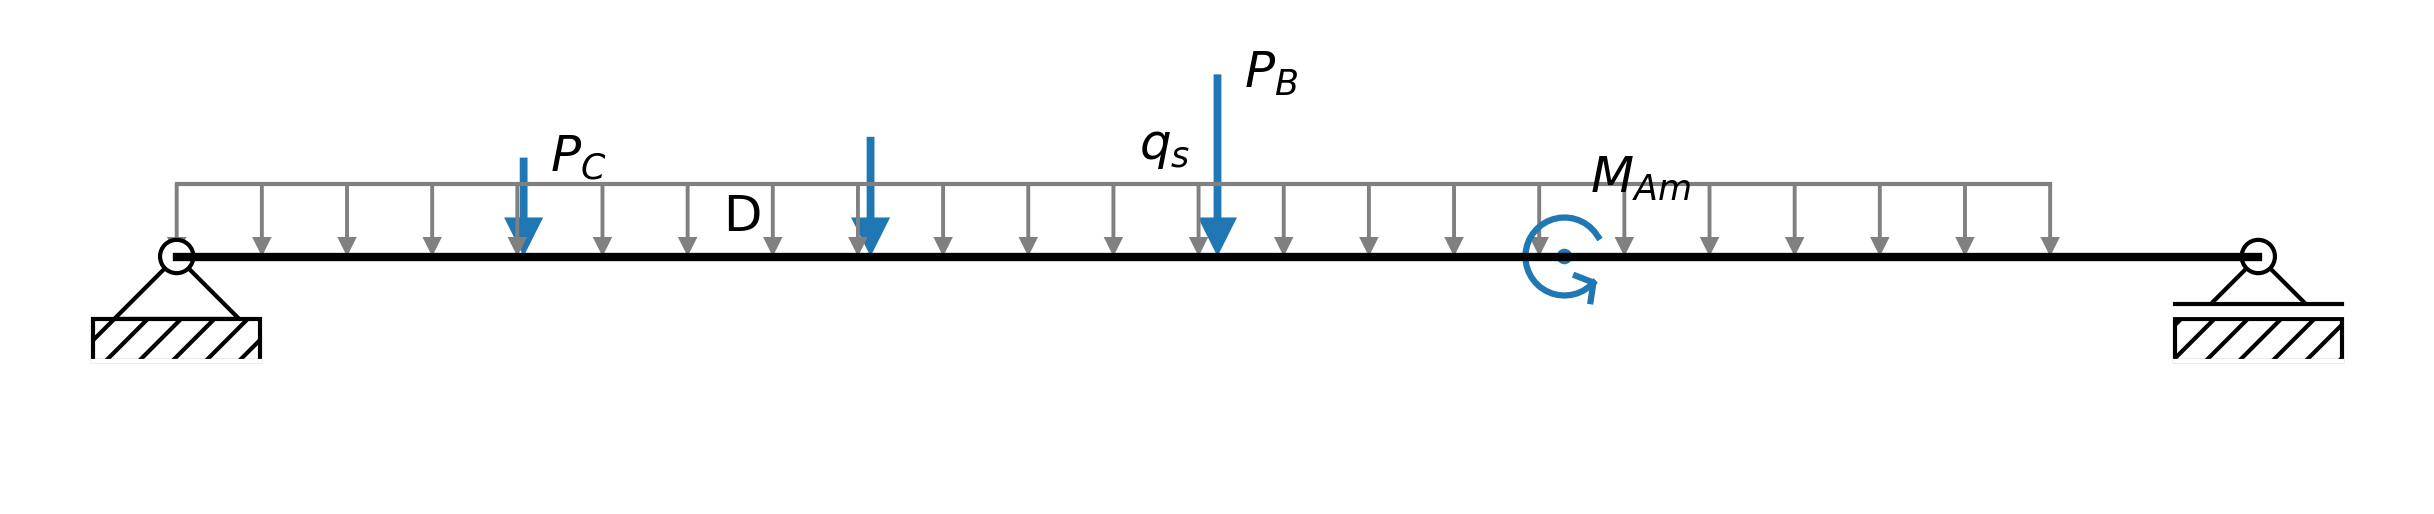

In [26]:
# The forces can also be plotted instead.
ps.plotBeamDiagram(beam, plotLabel=True, labelForce=True)


(<Figure size 2400x480 with 1 Axes>, <Axes: >)

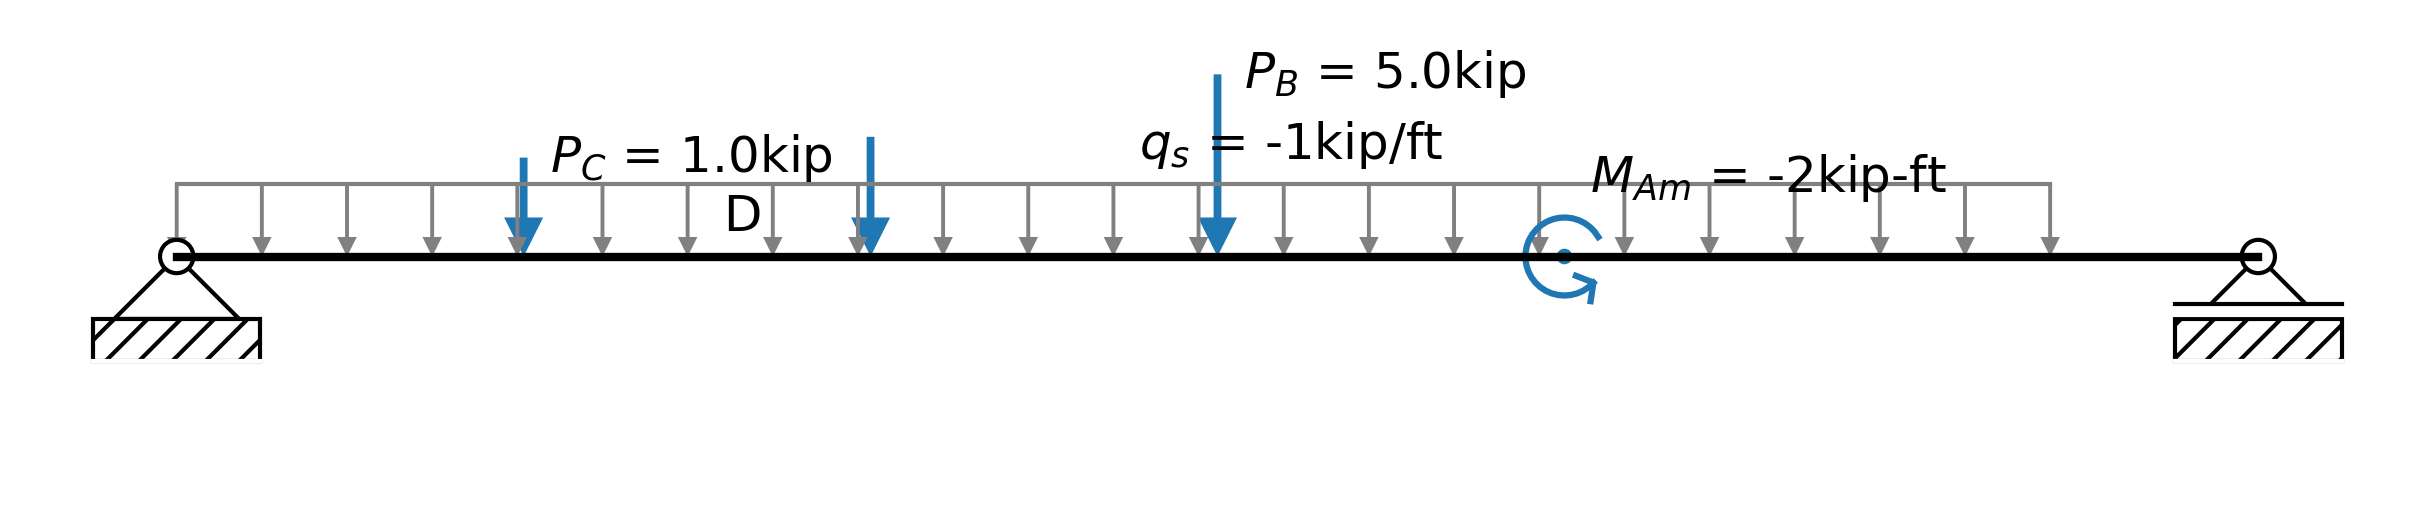

In [27]:

# The values of the force can also be plotted
ps.plotBeamDiagram(beam, plotLabel=True, labelForce=True, plotForceValue=True)


---
 **Unit Manager**

(<Figure size 2400x480 with 1 Axes>, <Axes: >)

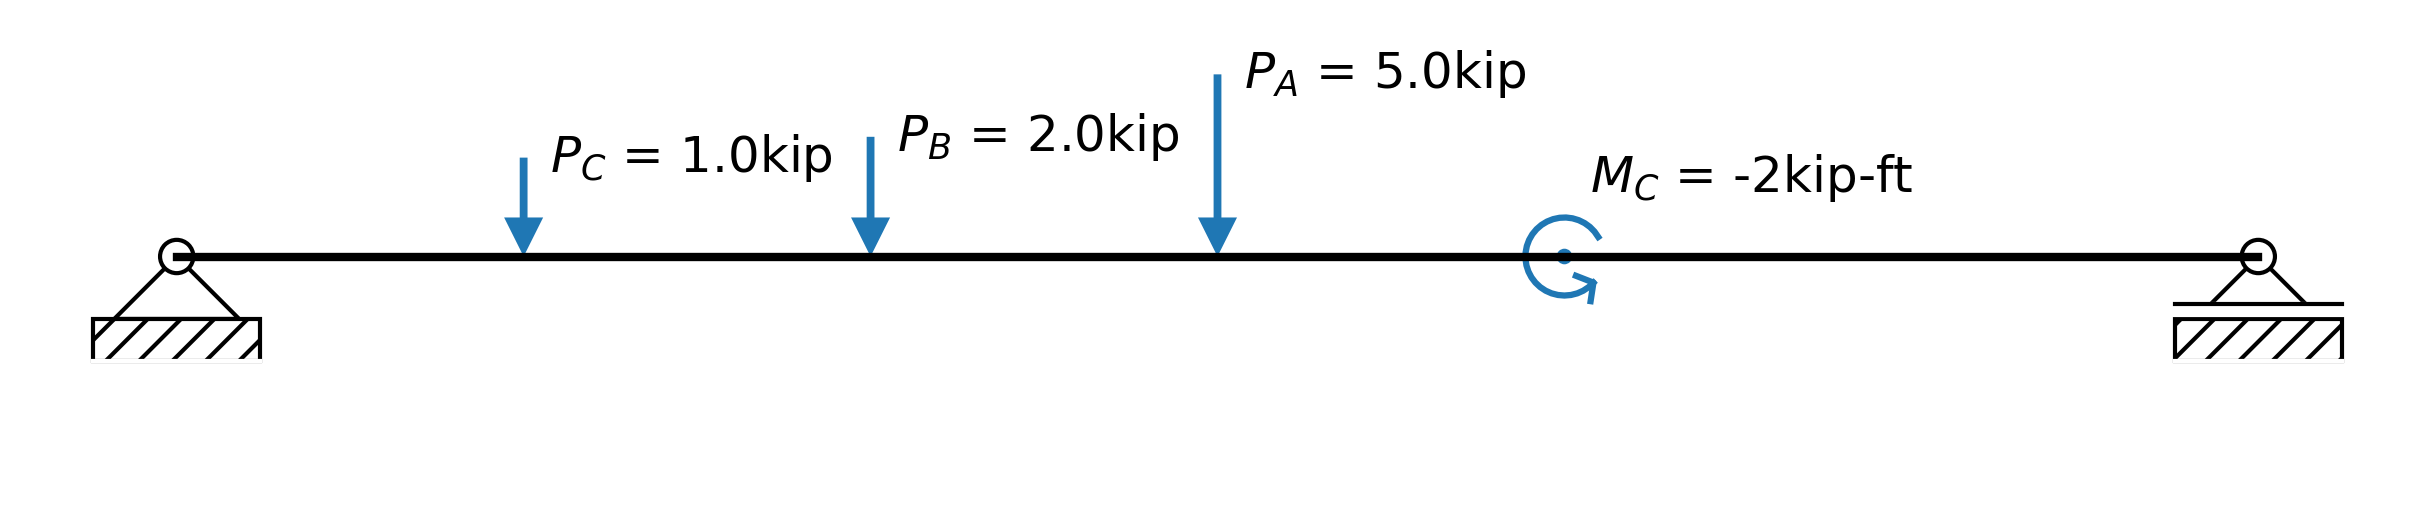

In [28]:
# The following example shows some of the options for plotting forces.
# First a basic beam is defined and loads are applied ot it.

import planesections as ps
import numpy as np
from planesections.units.metric import m, mm, kN, GPa

L = 10*m
P = -5.*kN
beam = ps.newSimpleEulerBeam(L)
beam.addVerticalLoad(L/2, P, 'A')
beam.addVerticalLoad(L/3, P/2.5, 'B')
beam.addVerticalLoad(L/6, P/5, 'C')
beam.addMoment(2*L/3, P/2, 'C')

# The units on the forces can be changed by passing in the desired units, or
# changing the global unit environment.
# Note that the diagram is incorrect if we were to do this - the unit handler only
# changes the diagram units!

ps.diagramUnits.setActiveEnvironment('imperial_ftkip')
ps.diagramUnits.modifyActiveEnvironment('force', [{'unit':'kip', 'scale':0.001, 'Ndecimal':2}])
ps.plotBeamDiagram(beam, plotLabel=True, labelForce=True, plotForceValue=True)
# ps.plotBeamDiagram(beam, plotLabel=True, labelForce=True, plotForceValue=True, units='imperial_ftlb')
# The units can also be managed by selecting the appropriate unit type in the plot function



## Example 2A Basic Beam

(<Figure size 2400x480 with 1 Axes>, <Axes: >)

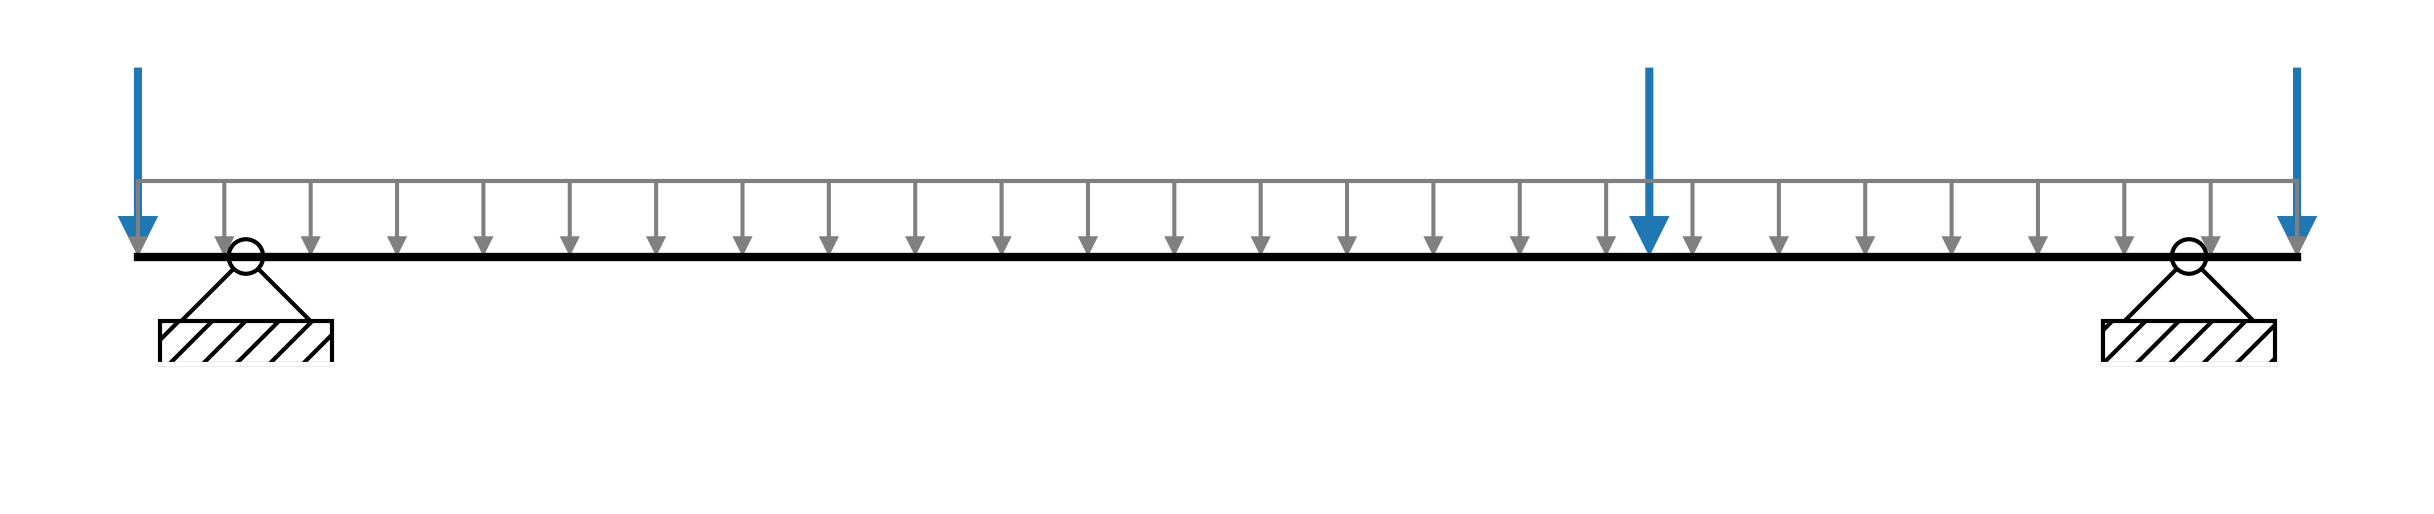

In [29]:
import planesections as ps
import numpy as np
from planesections.units.metric import m, mm, kN, GPa
# NOTE - units are set to 1 - explained by CSLOTBOOM within youtube videos
# why import units now???

# Define the material properties then make the rectangular section.
E = 9*GPa
d = 300*mm
w = 265*mm
section = ps.SectionRectangle(E, d, w)

# Define the beam. In this example we will define the node coordinants directly,
# then add those to the beam. By manually defining the node coordinants, it
# is possible to place them anywhere in the beam desired.
L = 10*m
Loffset = 0.5*m
beam = ps.EulerBeam(section = section)
x = np.linspace(0, L, 80)
beam.addNodes(x)

# Define the node fixities. The fixity is a list for each DOF, where 1 represents
# fixed, and 0 represents free in this case two pin constraints are applied to the
# beam. Lists or Numpy arrays can be used for fixities.
pin   = ps.FixityTypes2D.getPinned()
beam.setFixity(Loffset, pin)
beam.setFixity(L - Loffset, pin)

#Define the beam nodes loads
q = np.array([0.,-1*kN])
beam.addVerticalLoad(0, -5*kN)
beam.addVerticalLoad(L *0.7, -5*kN)
beam.addVerticalLoad(L, -5*kN)
beam.addDistLoad(0, L, q)
ps.plotBeamDiagram(beam)


(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (m)', ylabel='Displacement  (mm)'>,
 [<matplotlib.lines.Line2D at 0x7e290afe09a0>])

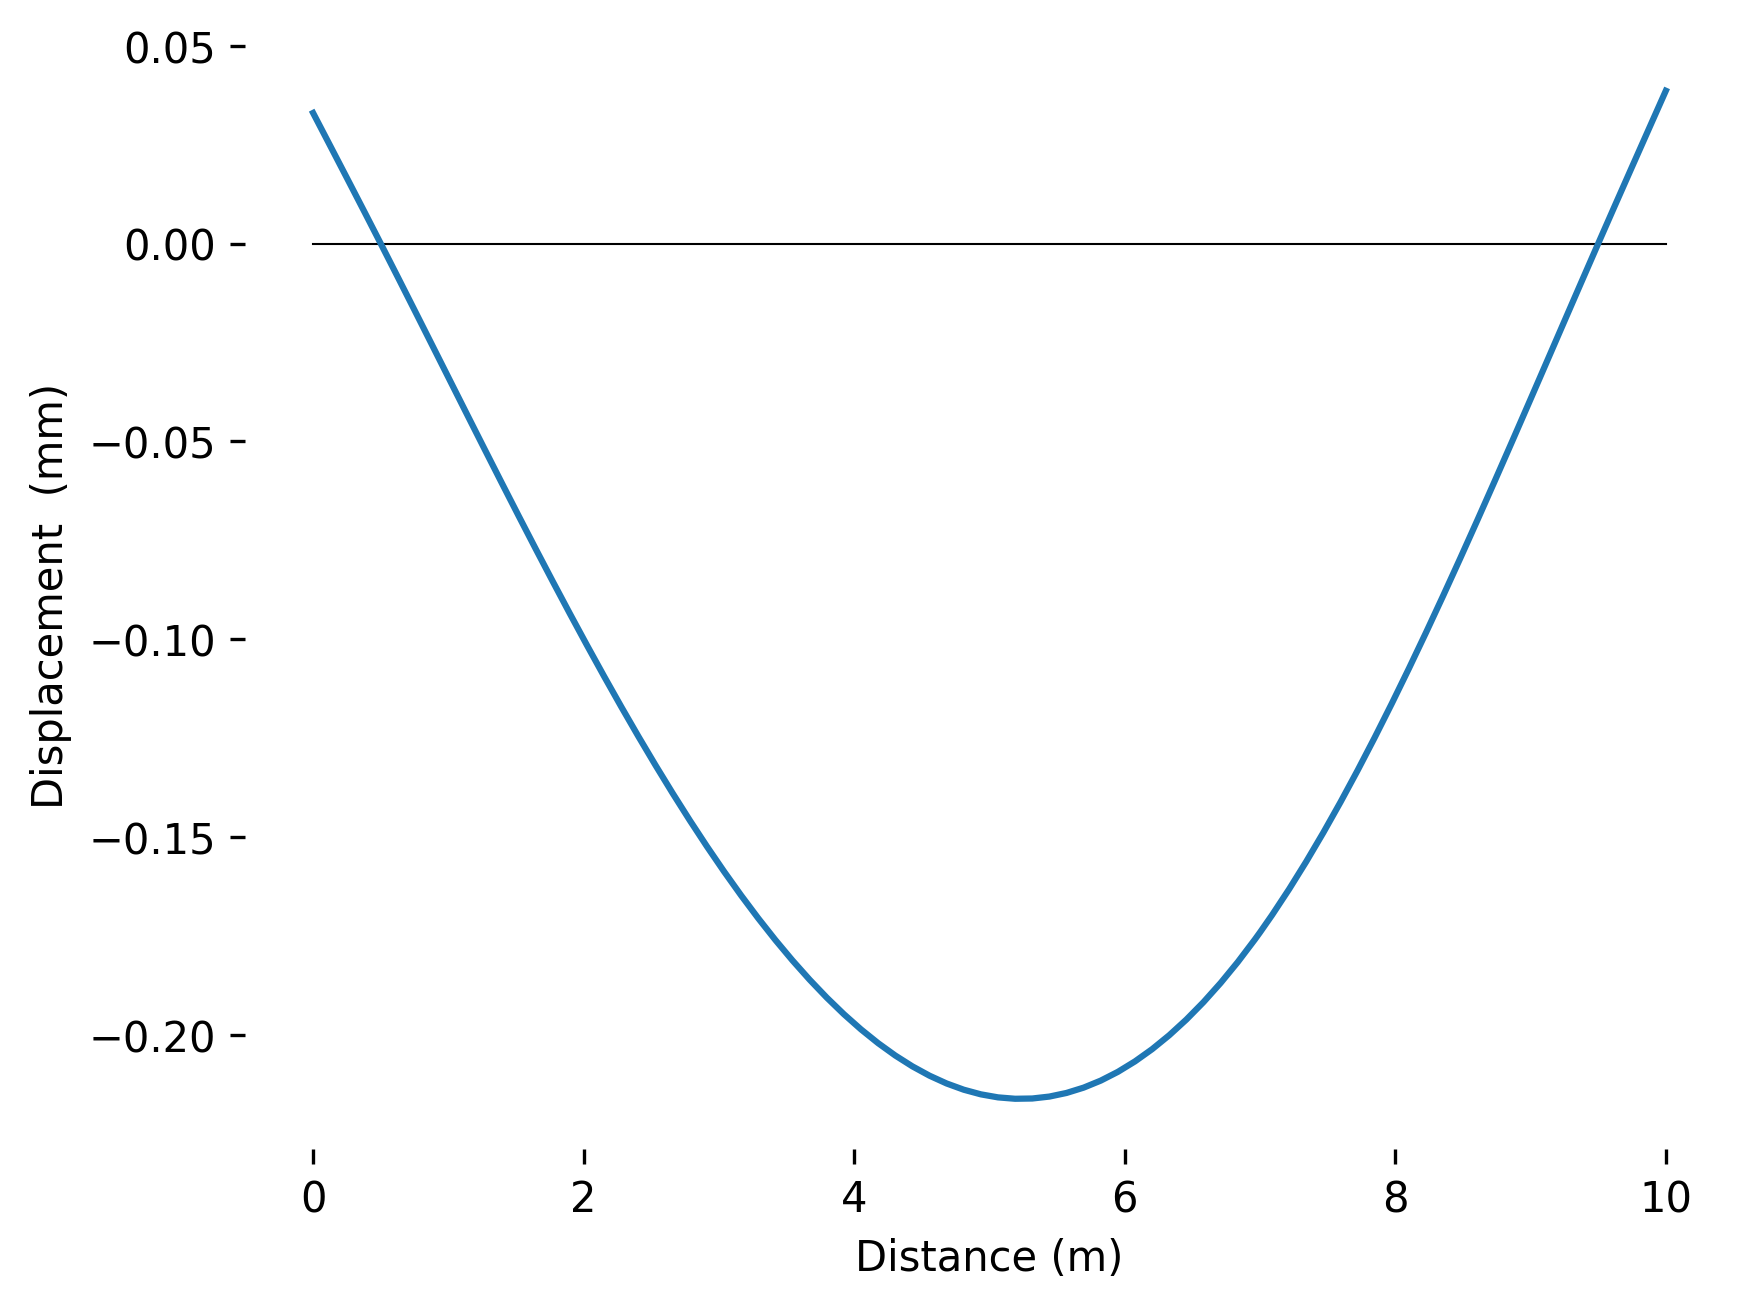

In [30]:
# Run the analysis
analysis = ps.OpenSeesAnalyzer2D(beam)
analysis.runAnalysis()

# Plot results
ps.plotDisp(beam, scale=10, yunit = 'mm')  #scale does not work

(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (m)', ylabel='Displacement  (mrad)'>,
 [<matplotlib.lines.Line2D at 0x7e290b038d90>])

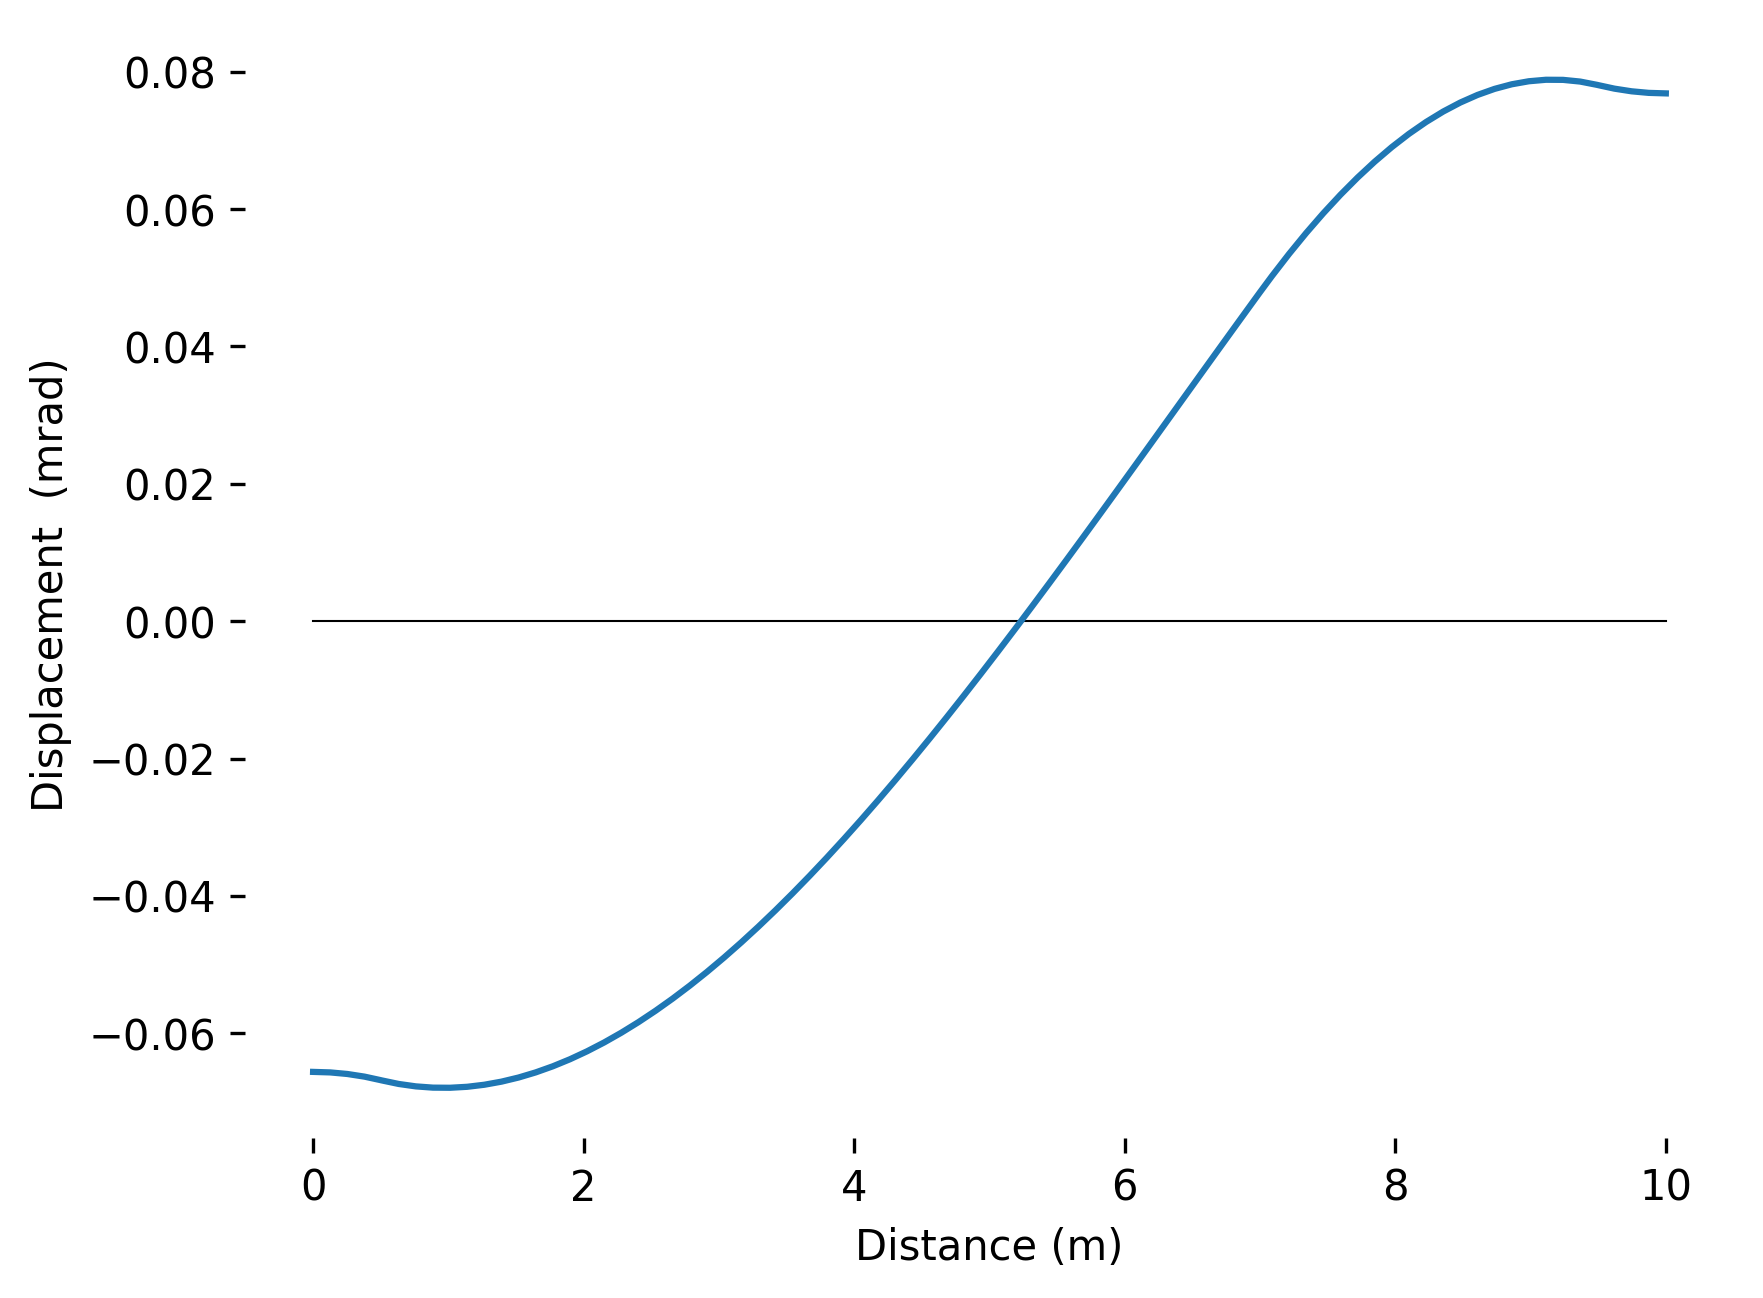

In [31]:
ps.plotRotation(beam, scale=10, yunit = 'mrad')

(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (m)', ylabel='Displacement  (mm)'>,
 [<matplotlib.lines.Line2D at 0x7e290b0a38e0>])

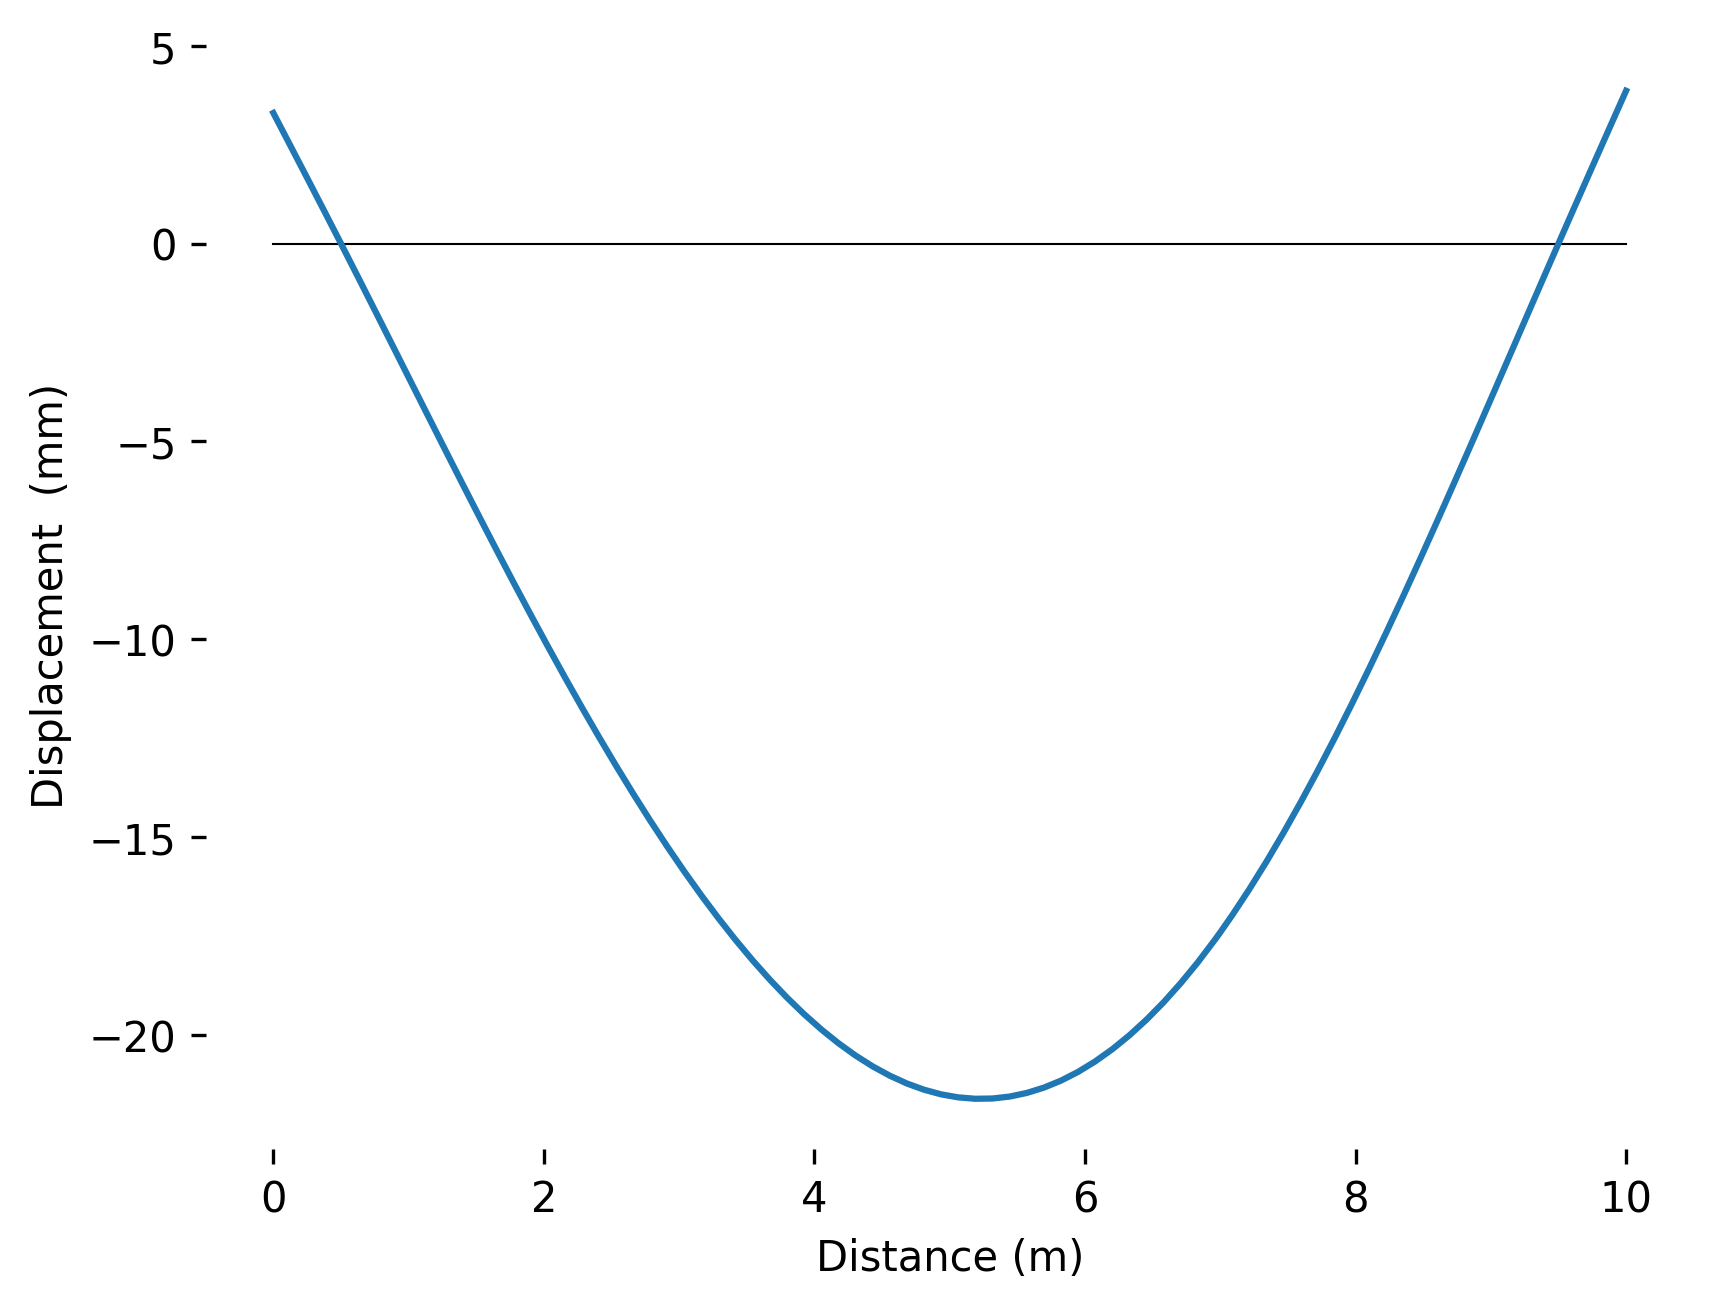

In [32]:
ps.plotVertDisp(beam)

## example 2b Simple Imperial

(<Figure size 2400x480 with 1 Axes>, <Axes: >)

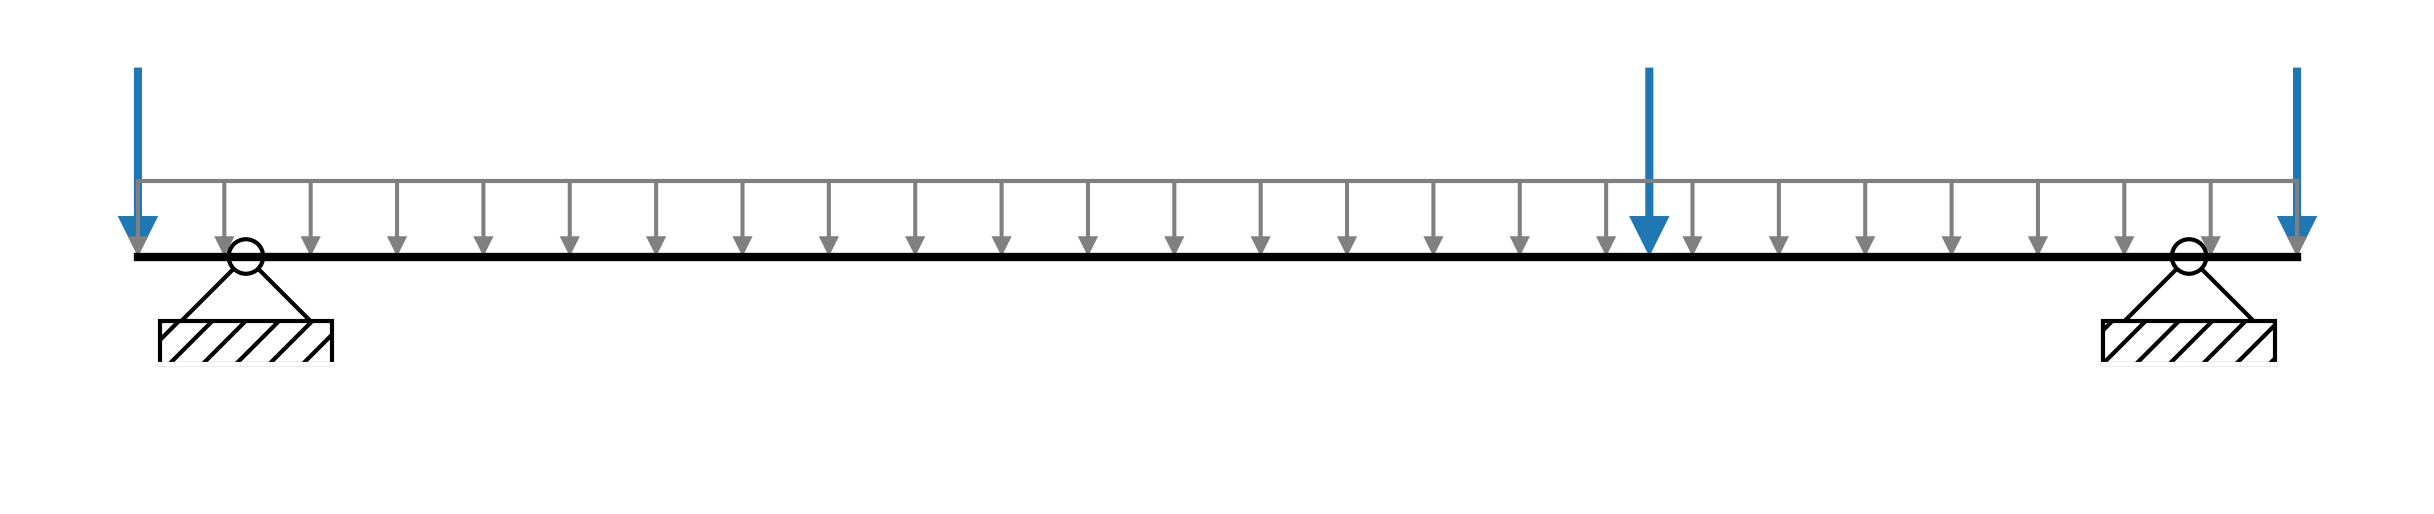

In [33]:
# The following is a more realist example that uses user defined section
# propreties for the beam. Units are in imperial.


import planesections as ps
import numpy as np

#Start by defining the units for the problem, the outputs need to be in a consistent
#unit base for FEM. In this case, lb and ft are used.
psf = 1
psi = 144*psf
ksi = 1000*psi
ft = 1
inch = ft / 12
kip = 1000

#Define the material properties then make the rectangular section.
E = 1305*ksi
d = 12*inch
w = 10*inch
section = ps.SectionRectangle(E, d, w)

#Define the beam. In this example we will define the node coordinants directly,
#then add those to the beam. By manually defining the node coordinants, it
#is possible to place them anywhere in the beam desired.
L = 30*ft
Loffset = 1.5*ft
x       = np.linspace(0, L, 80)
beam = ps.EulerBeam(section = section)
beam.addNodes(x)

#Define the node fixities. The fixity is a list for each DOF, where 1 represents
#fixed, and 0 represents free in this case two pin constraints are applied to the
#beam. Lists or Numpy arrays can be used for fixities.
fixed = np.array([1, 1, 0])
beam.setFixity(Loffset, fixed)
beam.setFixity(L - Loffset, fixed)

#Define the beam nodes loads
q = np.array([0.,-1*kip/ft])
beam.addVerticalLoad(0, -5*kip)
beam.addVerticalLoad(L *0.7, -5*kip)
beam.addVerticalLoad(L, -5*kip)
beam.addDistLoad(0, L, q)
ps.plotBeamDiagram(beam)


(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (ft)', ylabel='Displacement  (in)'>,
 [<matplotlib.lines.Line2D at 0x7e290ade9450>])

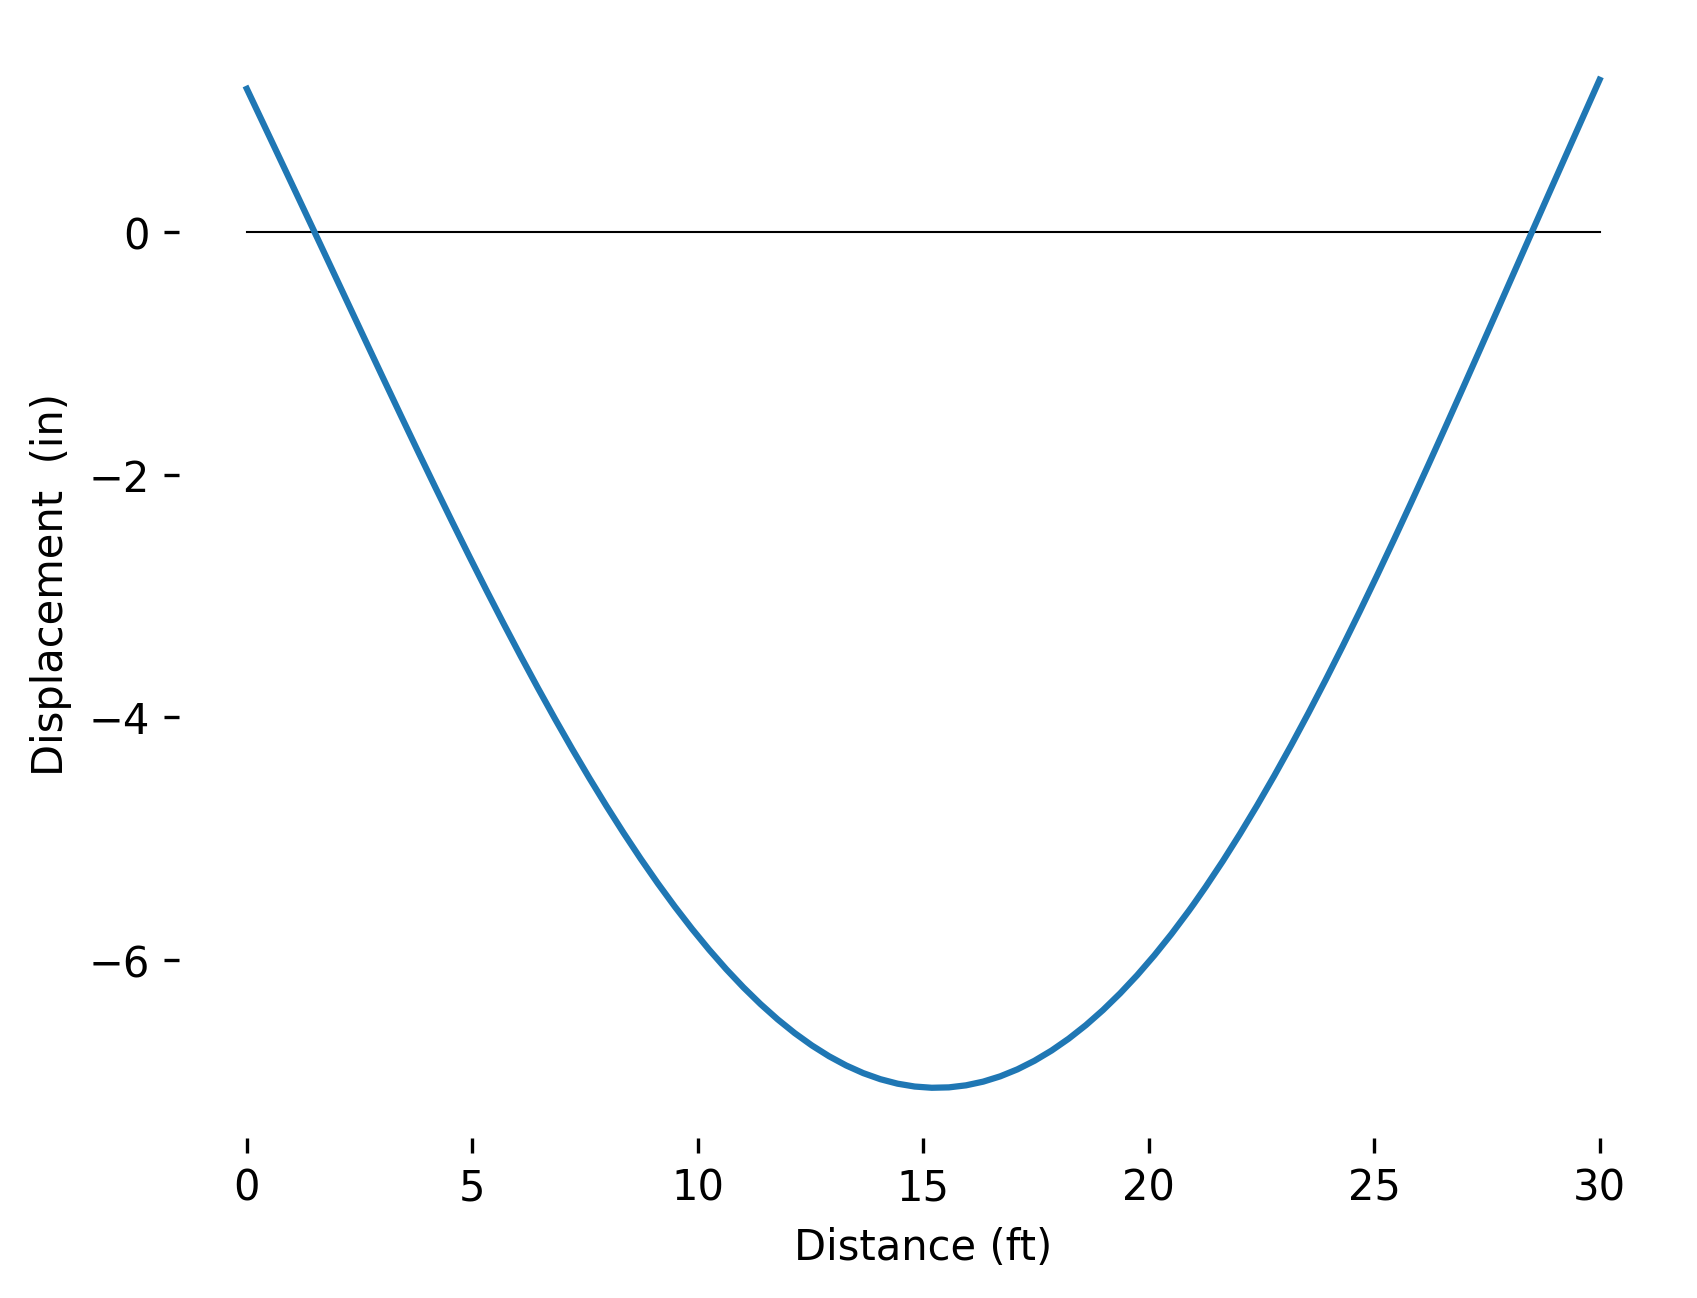

In [34]:

"""
Run the analysis
"""
analysis = ps.OpenSeesAnalyzer2D(beam)
analysis.runAnalysis()

"""
Plot results
"""
ps.plotDisp(beam, scale=1/inch, yunit = 'in', xunit = 'ft')

## Example 2c complex beam

(<Figure size 2400x480 with 1 Axes>, <Axes: >)

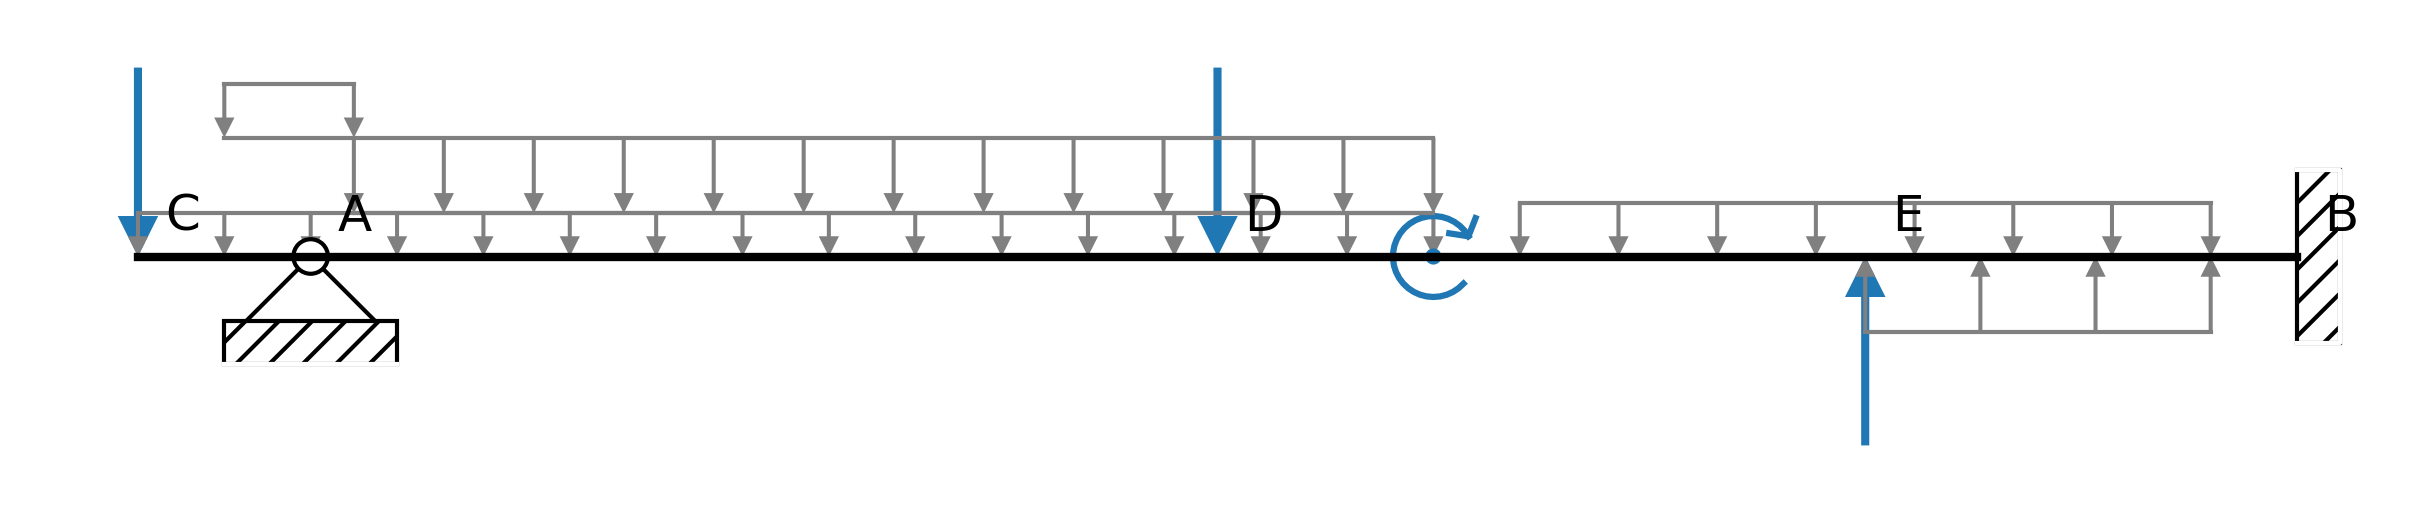

In [35]:
# An example with lots of forces.

import planesections as ps
from planesections.units.metric import m, kN
import numpy as np

L = 5*m
x = np.linspace(0,L,80)
beam = ps.EulerBeam(x)

pinned = ps.FixityTypes2D.getPinned()
fixed  = ps.FixityTypes2D.getFixed()

beam.setFixity(0.4, pinned, label = 'A')
beam.setFixity(L, fixed, label = 'B')

P = -2*kN
M = 5*kN*m
q = np.array([0.,-kN/m])
beam.addVerticalLoad(0, P,label = 'C')
beam.addVerticalLoad(2.5, P,label = 'D')
beam.addVerticalLoad(4, -P,label = 'E')

beam.addMoment(3, M)

beam.addDistLoad(0, 3, q)
beam.addDistLoad(0.2,0.5, q*2)
beam.addDistLoad(0.5,3, q*4)
beam.addDistLoad(4, 4.8, -q*4)
beam.addDistLoad(3.2, 4.8, q*2)

ps.plotBeamDiagram(beam)


(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (m)', ylabel='Internal Force  (kN)'>,
 [<matplotlib.lines.Line2D at 0x7e290ad663b0>])

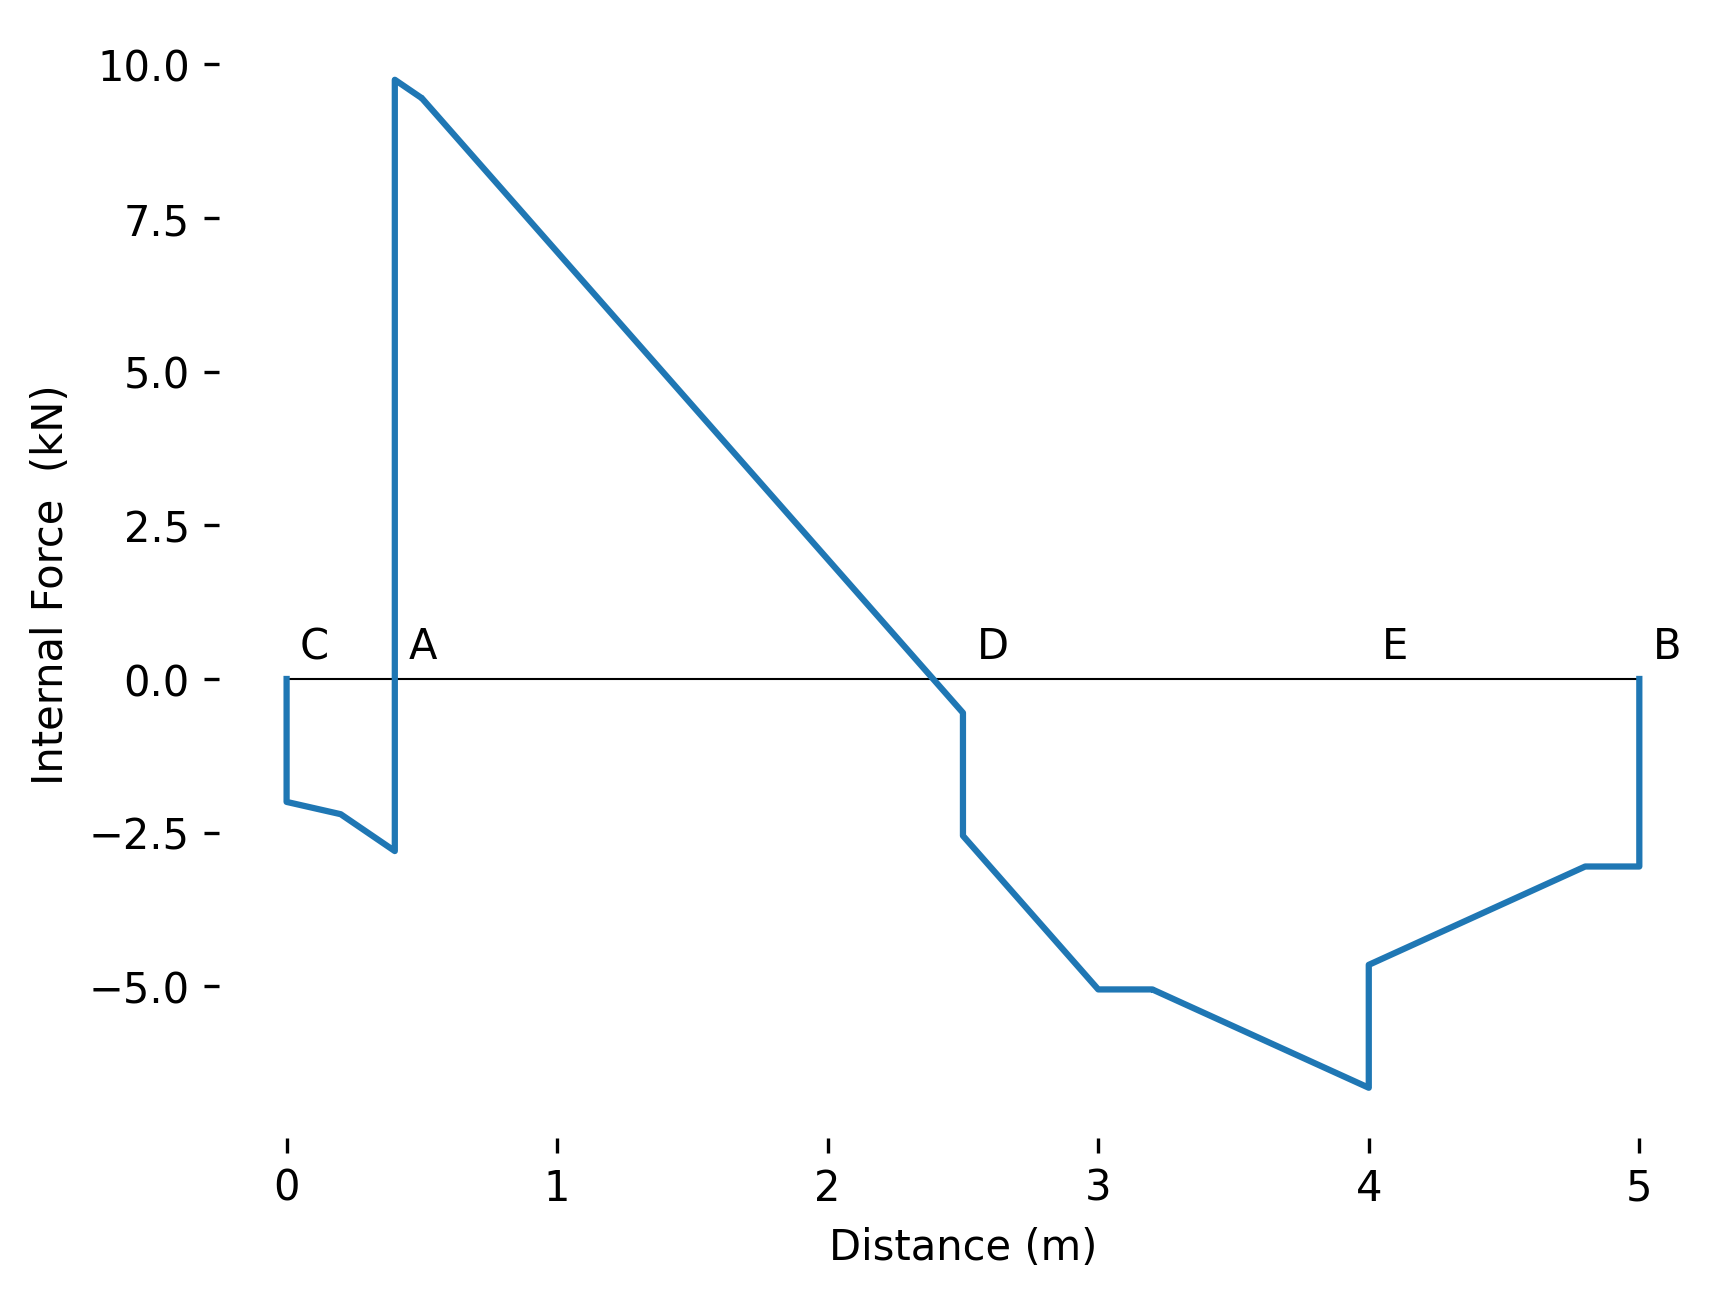

In [36]:
analysis = ps.OpenSeesAnalyzer2D(beam)
analysis.runAnalysis()
ps.plotShear(beam, scale = 1/kN, yunit = 'kN')

(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (m)', ylabel='Internal Force  (kNm)'>,
 [<matplotlib.lines.Line2D at 0x7e290af124d0>])

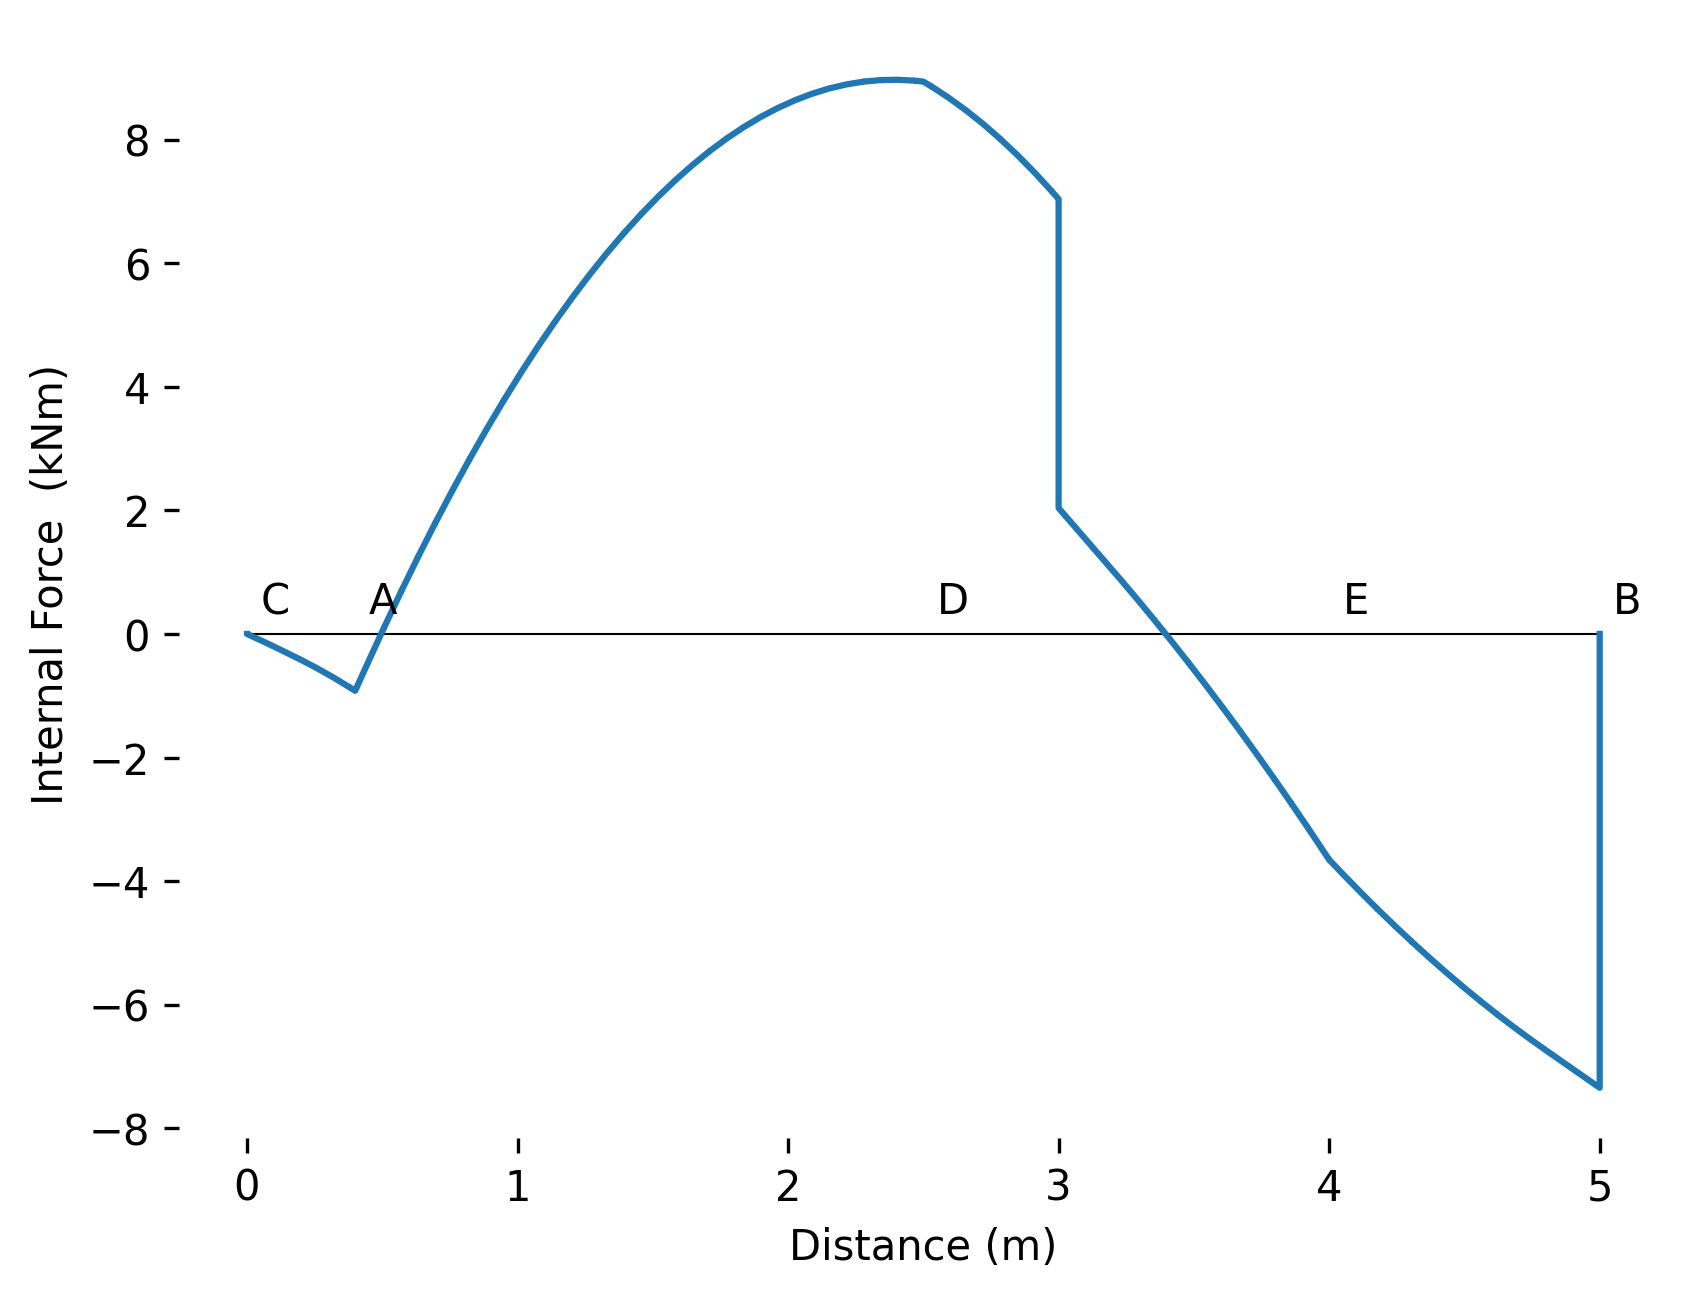

In [37]:

ps.plotMoment(beam, scale = -1/kN, yunit = 'kNm')



## ex 2d 3D beam

A simple example using a 3D beam instead of a 2D beam.
3D beams can have shear forces applied in and out of the page, in addition
to the vertical forces. They also have torsion moments and "weak axis" moments.

When creating a new beam, the dimension can be set to '3D' using the
dimension attribute.

Fixities work the same as a 2D beam, except there is now 6DOF! The first three
are translation (ux, uy, uz). The next three are rotation (rx, ry, rz).

If we leave the rx and ry dof free, the beam will actually be unstable -
that's no good!

Similarly, loads work the same, but with 6DOF. The loads are [Fx, Fy, Fz, Mx, My, Mz],

```
    y
    ┃
    ┃____x
   ╱
  ╱
 z
 ```



(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (m)', ylabel='Internal Force  (kN)'>,
 [<matplotlib.lines.Line2D at 0x7e290ac49780>])

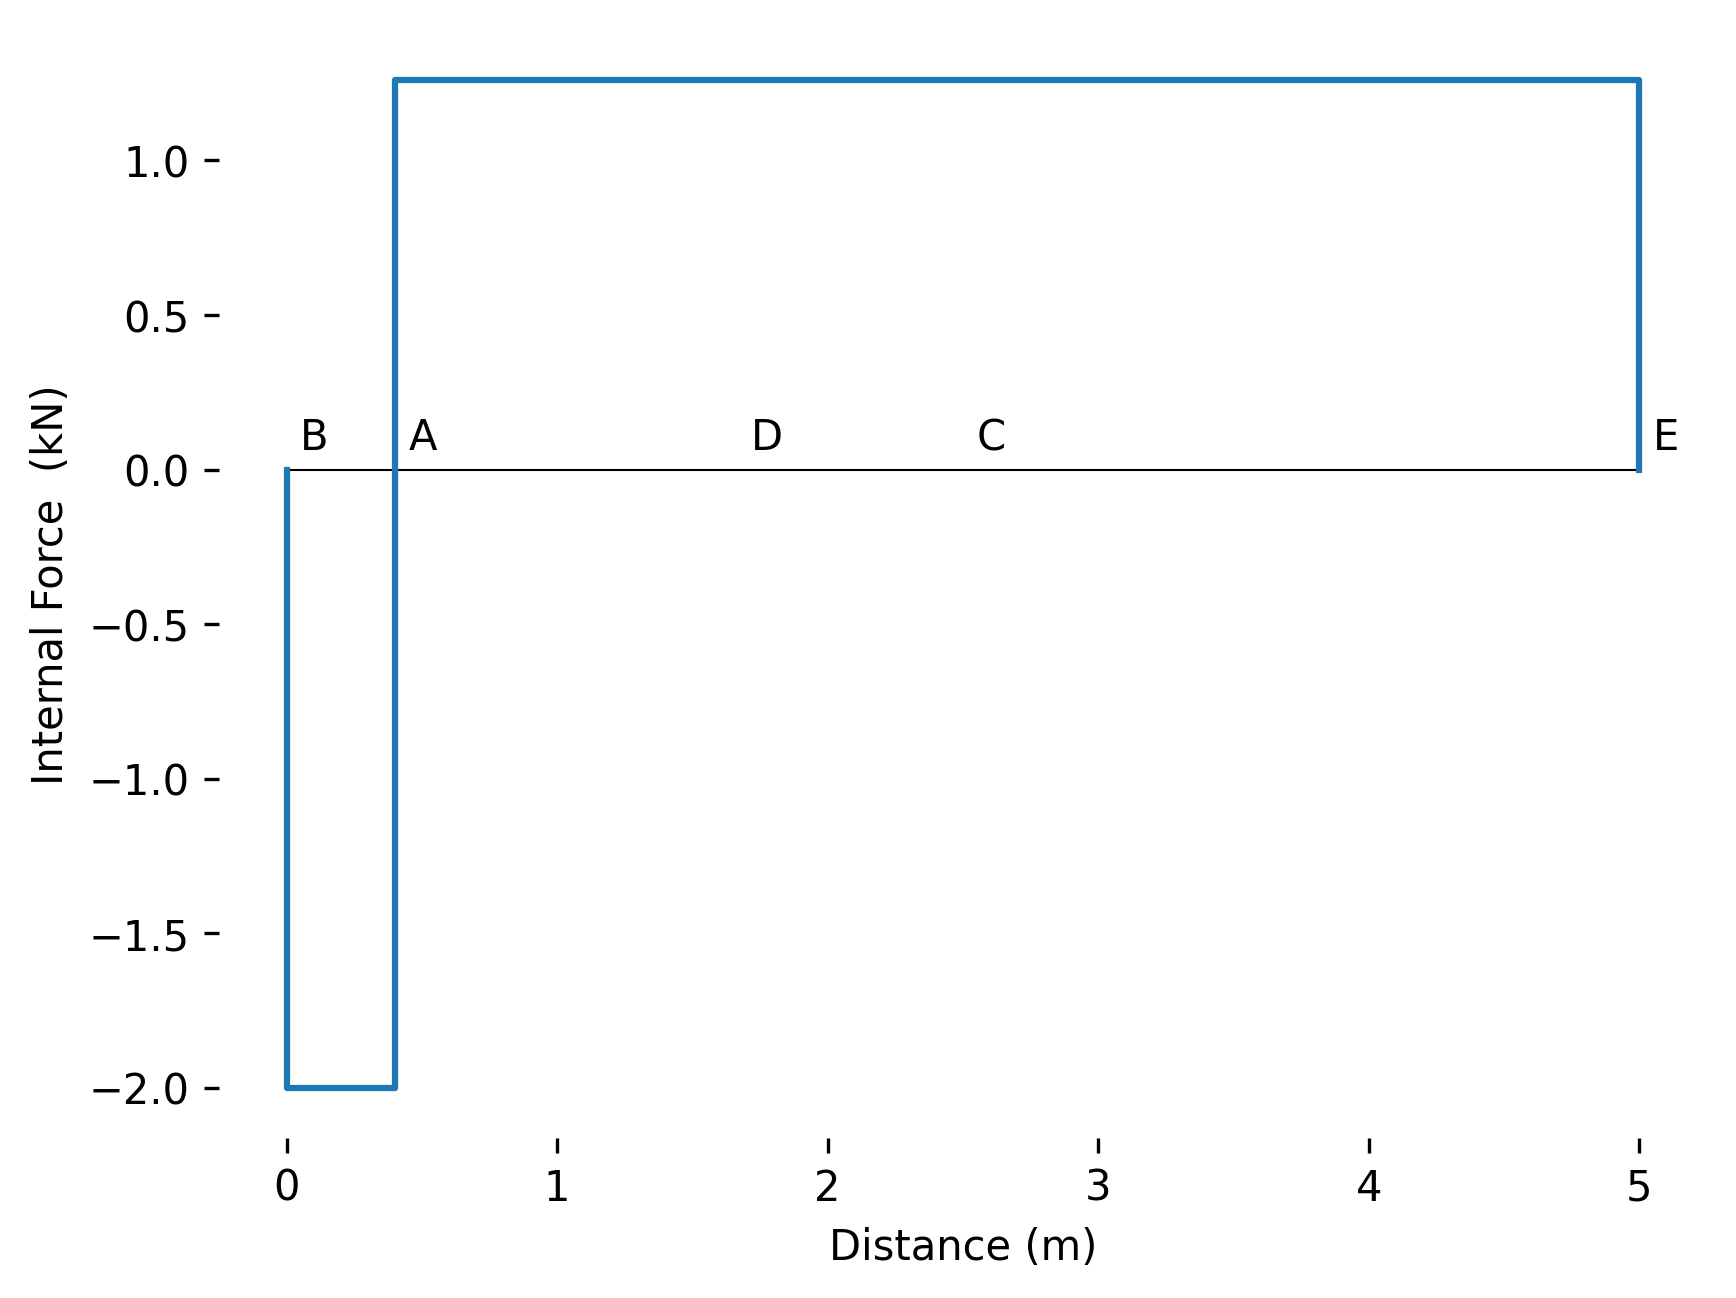

In [38]:
import planesections as ps
from planesections.units.metric import m, kN
import numpy as np

# When creating a new beam, the dimension can be set to '3D' using the
# dimension attribute.

L = 5*m
beam = ps.newEulerBeam(L, dimension='3D')

# Fixities work the same as a 2D beam, except there is now 6DOF! The first three
# are translation (ux, uy, uz). The next three are rotation (rx, ry, rz).
# If we leave the rx and ry dof free, the beam will actually be unstable -
# that's no good!

pinned = [1,1,1,1,1,0]
beam.setFixity(0.4, pinned, label = 'A')
beam.setFixity(L, pinned, label = 'E')
P = -2*kN
M = 5*kN*m
torsionMoment = [0, 0, 0, 2.5*kN*m, 0, 0]
beam.addVerticalLoad(0, P,label = 'B')
beam.addMoment(2.5, M, label = 'C')
beam.addPointLoad(L/3, torsionMoment, label = 'D')

# In the analysis, a 3D needs to be added now.
analysis = ps.OpenSeesAnalyzer3D(beam)
analysis.runAnalysis()

#The plotting functions work similarly. To get the torsion, we need to include
ps.plotShear(beam, scale = 1/kN, yunit = 'kN')


(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (m)', ylabel='Internal Force  (kNm)'>,
 [<matplotlib.lines.Line2D at 0x7e290acba050>])

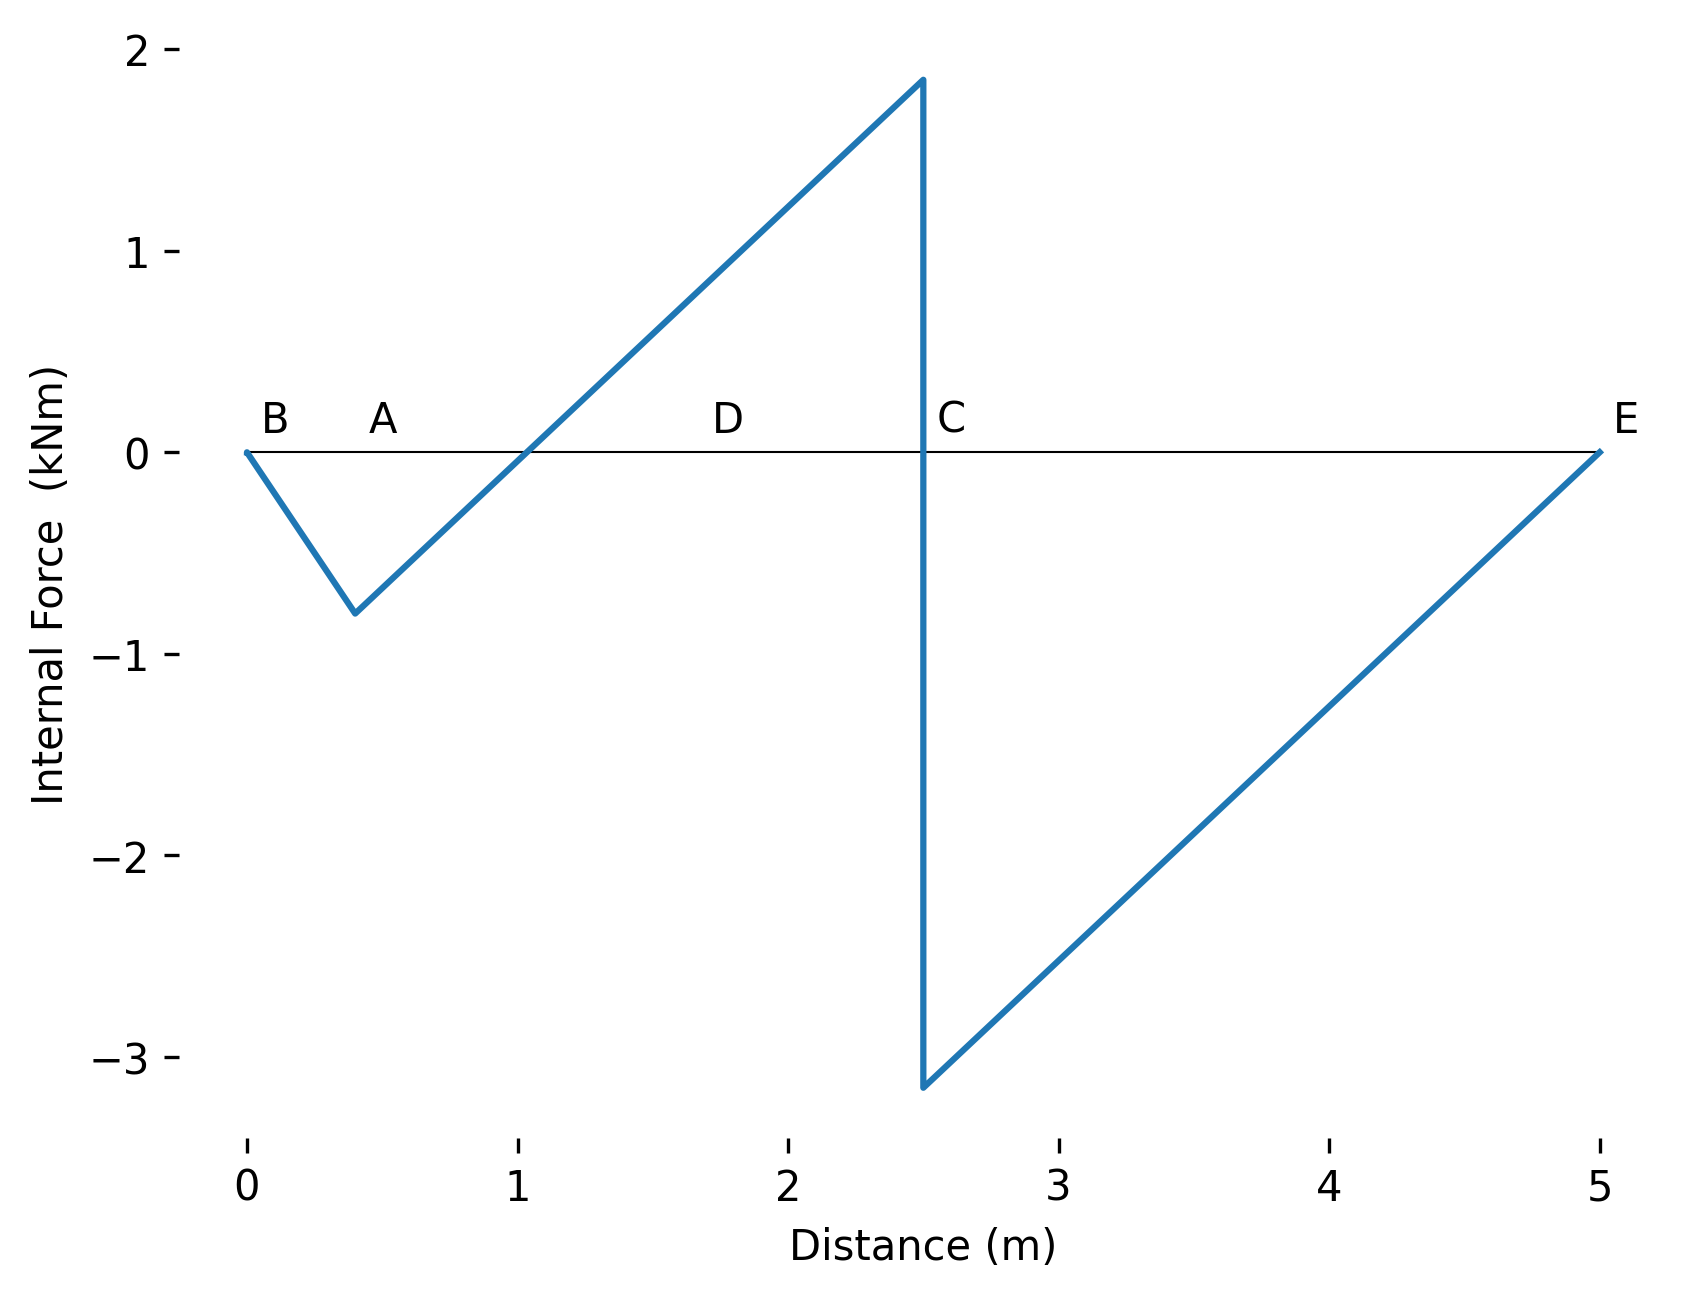

In [39]:

ps.plotMoment(beam, scale = -1/kN, yunit = 'kNm')


(<Figure size 1920x1440 with 1 Axes>,
 <Axes: xlabel='Distance (m)', ylabel='Internal Force  (kNm)'>,
 [<matplotlib.lines.Line2D at 0x7e290ab54190>])

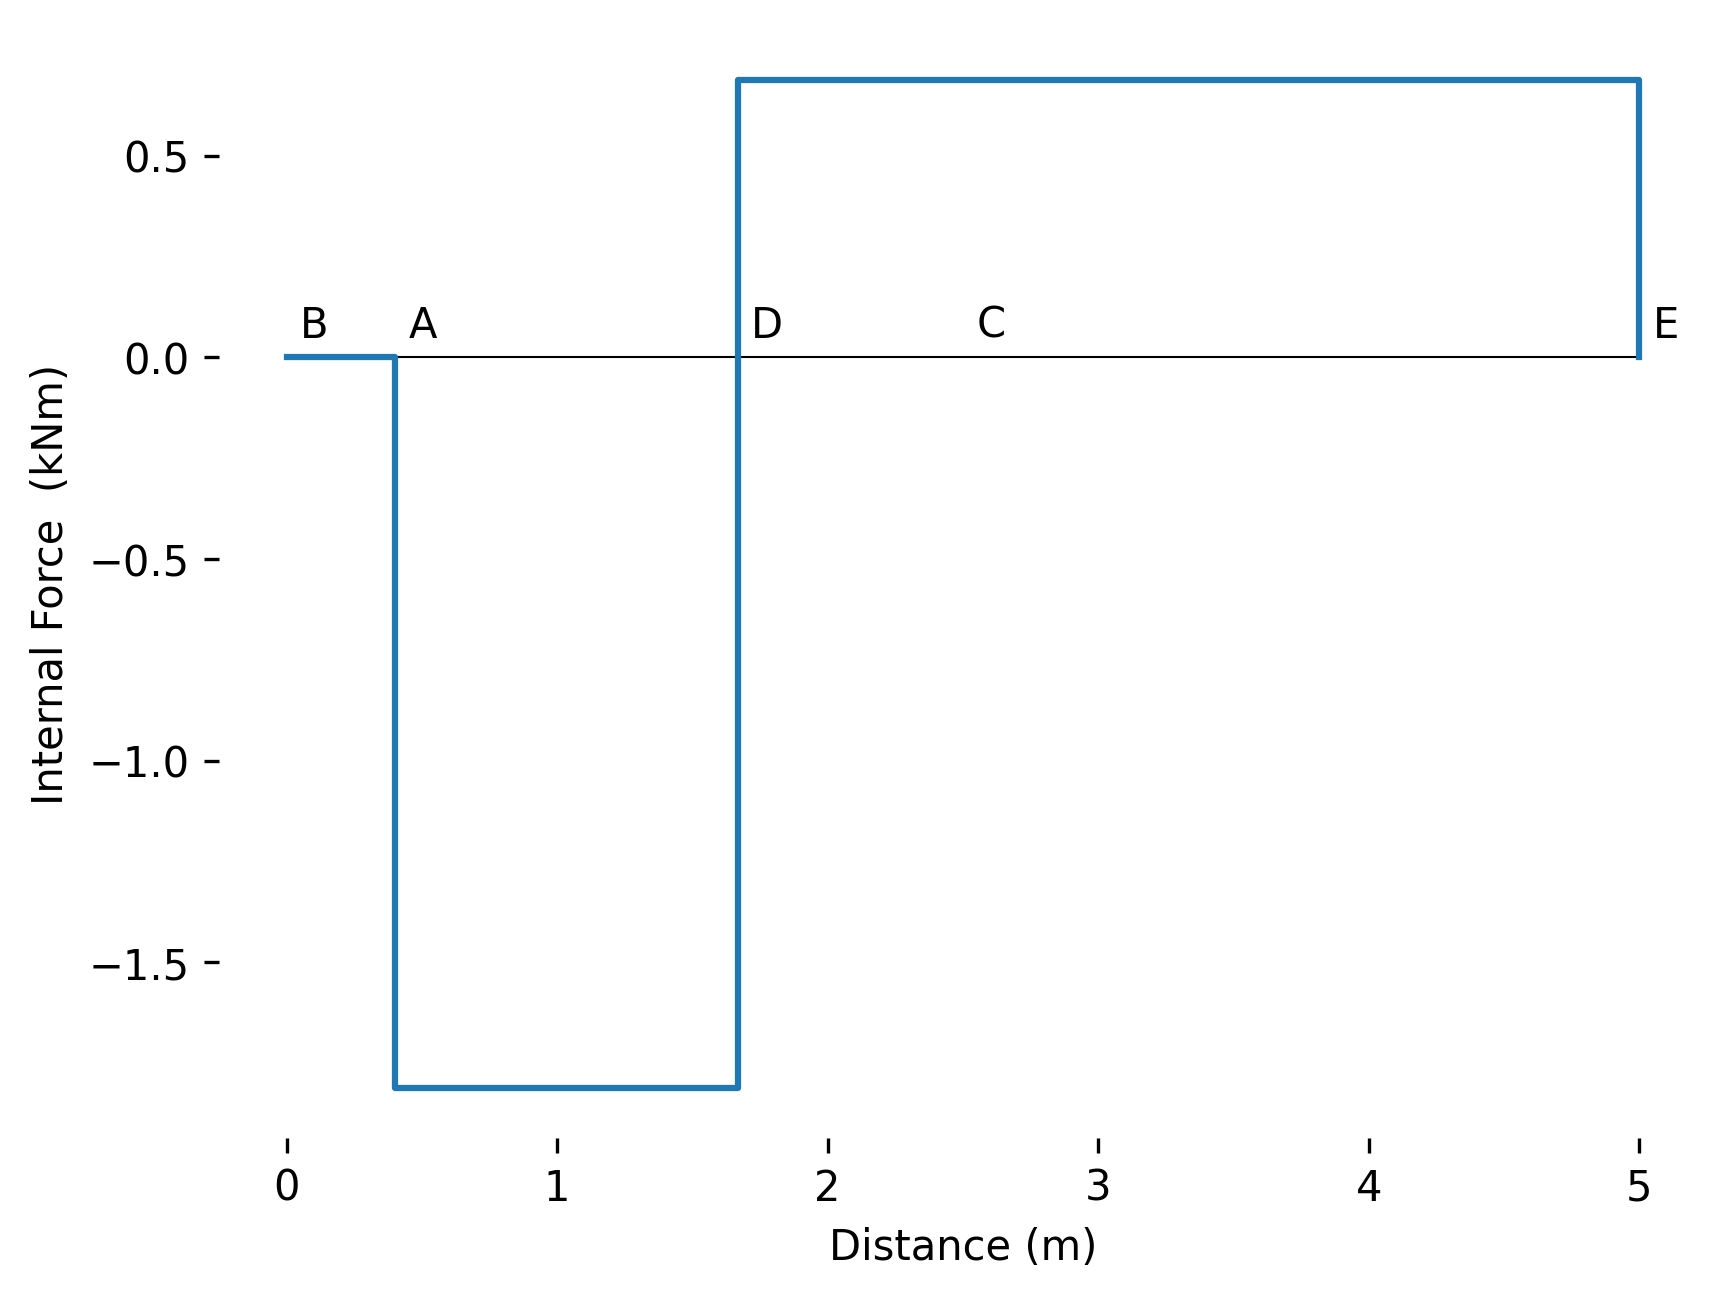

In [40]:

ps.plotInternalForce(beam, 3, scale = 1/kN, yunit = 'kNm')

